# Youtube trend reflects public interest 

Videos that are on YouTube trending page changes everyday and it is a reflection of what is happening in the world and the popular topics people are discussing at the time. At the time of this analysis, democratic and republic national convention just happened and the trailer for the new Batman movie was released.

I analyzed data from 4 English speaking countries (US, Australia, Canada, Great Britan) in detail to see what kinds of videos and channels are trending at this time (08/26/2020-09/04/2020). 

<b>There was a large change the contents of videos in a day.</b>  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* For the "News & Politics" category, on 8/26/20, top words used as title and tags were "Trump" & "republican", while on the 8/27/20, they were "hurricane" and "laura"." This suggests the shift in people's interest from the politacal party conventions to Hurricane Laura in Texas.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* For the "Entertainment" category, videos of the same topic trended for days at a time. For ensitance, many videos related to the Batman trailer (released on 8/22/20) were trending until 8/28/20, and many videos on Chadwick Boseman (passed away on 8/28/20) were trending on 09/04/20 (6 days after the news). 
    
<b>The videos trending were related to topics with high indecies for interest over time on Google.</b>  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* Interest for any word peaked almost immediately (within 2 days) after the incident (RNC, shooting of Jacob Blake, Chadwick Boseman's death...etc.) or release of movie trialers.<br>
    
<b>What kinds of channels produces trending videos?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Channels by large coorperations. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * This is expected. The videos from these channels were either starting the trend (release of a movie trailer or video or videos political conventions) or produce videos very fast on a popular topic.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Channels with large followings. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * As also expected, channels with large followings (5M<) had multiple trending videos. Examples are 'James Charles' and 'emma chamberlain'.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * However, they (especially James Charles) are also good at picking topics that are high of interest (purchasing homes, people who are popular at the moment).<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Channels that cover popular topics. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * For days I covered, the channel 'The United Stand' (800k subscribers) who covers information on 'Manchester United' (English football/soccer team) had 15 trending videos (2 or more trending every day). Interest over time for the search term 'Manchester United' is very high. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * Other small channels (<1.5M subscribers. E.g.  SafferonBarkerVlogs) also had multiple trending videos, and their videos had tags or titles with high google interest ('dream house', 'road trip') and had similar titles as other trending videos ('I bought my dream house!!' by SafferonBarkerVlogs vs. 'I Bought My First Home! 2020 House Tour' by James Charles (21M subscribers).<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * As stated above, other examples are videos on popular topics related to news outbreaks.<br>


Miley Cyrus
Celtics
David Blaine
Nuggets
Monica
Leonard Fournette





Using this script to download new data
https://github.com/mitchelljy/Trending-YouTube-Scraper

Run this on jupyter notebook:
%run -i 'scraper.py'
Then change directory. And move all csv files to new directory.

## Data preparation

In [1]:
# Import packages
import os 
import pandas as pd
import glob
from datetime import datetime
from plotnine import *
import json
from pandas.io.json import json_normalize 
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import collections
import numpy as np
from matplotlib import rcParams
import matplotlib.cm as cm

In [3]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import datetime
from datetime import datetime, date, time


from pytrends.request import TrendReq


In [4]:
# Get file names
filenames = [i for i in glob.glob('*videos.{}'.format('csv'))]

In [5]:
# Run this instead to get file names for specific date
# filenames = [i for i in glob.glob('20.27.08'+'*.{}'.format('csv'))]

In [6]:
filenames

['20.04.09_GB_videos.csv',
 '20.29.08_GB_videos.csv',
 '20.27.08_CA_videos.csv',
 '20.26.08_JP_videos.csv',
 '20.01.09_CA_videos.csv',
 '20.03.09_AU_videos.csv',
 '20.03.09_US_videos.csv',
 '20.27.08_IN_videos.csv',
 '20.26.08_DE_videos.csv',
 '20.26.08_GB_videos.csv',
 '20.29.08_IN_videos.csv',
 '20.26.08_CA_videos.csv',
 '20.04.09_CA_videos.csv',
 '20.26.08_IN_videos.csv',
 '20.02.09_US_videos.csv',
 '20.02.09_AU_videos.csv',
 '20.29.08_CA_videos.csv',
 '20.27.08_GB_videos.csv',
 '20.26.08_FR_videos.csv',
 '20.01.09_GB_videos.csv',
 '20.03.09_CA_videos.csv',
 '20.27.08_MX_videos.csv',
 '20.02.09_GB_videos.csv',
 '20.27.08_US_videos.csv',
 '20.27.08_AU_videos.csv',
 '20.01.09_US_videos.csv',
 '20.01.09_AU_videos.csv',
 '20.26.08_MX_videos.csv',
 '20.04.09_AU_videos.csv',
 '20.04.09_US_videos.csv',
 '20.02.09_CA_videos.csv',
 '20.29.08_US_videos.csv',
 '20.29.08_AU_videos.csv',
 '20.26.08_RU_videos.csv',
 '20.03.09_GB_videos.csv',
 '20.29.08_MX_videos.csv',
 '20.26.08_KR_videos.csv',
 

In [7]:
# Extract columnnames
df = pd.read_csv(filenames[0])
columnnames = df.columns
# Create empty dataframe
videos = pd.DataFrame(columns = columnnames)
for f in filenames:
    d = pd.read_csv(f) 
    country = f[9:11] # Get country code from each filename
    d['Country'] = country # Add a column with country code
    videos = pd.concat([videos,d])
# Reset index
videos.reset_index(drop=True, inplace=True)

In [8]:
# Run this to export to excel
#videos.to_excel( "videos.xls", index=False, encoding='utf-8-sig')

Use this to get category code for each coutnry. https://developers.google.com/youtube/v3/docs/videoCategories/list

For US: 
part = id,snippet
regionCode: us

keep everything else empty.
Copy and paste into txt.app save as .json(in the same folder) for every country.

In [198]:
jsonfilenames = [i for i in glob.glob('categoryId_*.{}'.format('json'))]

In [199]:
jsonfilenames

['categoryId_AU.json',
 'categoryId_FR.json',
 'categoryId_IN.json',
 'categoryId_CA.json',
 'categoryId_JP.json',
 'categoryId_BR.json',
 'categoryId_DE.json',
 'categoryId_RU.json',
 'categoryId_MX.json',
 'categoryId_GB.json',
 'categoryId_US.json',
 'categoryId_KR.json']

In [11]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
categoryIDs = pd.DataFrame(columns = ['id','snippet.title'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['items']) # Get a table from the last column
    df2 = df.loc[:,('id','snippet.title')] # Extract only id and category name
    country = f[11:13] # Get country code
    df2['Country'] = country # Add to a column
    categoryIDs = categoryIDs.append(df2)
categoryIDs.columns = ['id','Category','Country'] # Rename columns
categoryIDs.reset_index(drop=True, inplace=True)

In [12]:
categoryIDs

id          Category Country
0     1  Film & Animation      AU
1     2  Autos & Vehicles      AU
2    10             Music      AU
3    15    Pets & Animals      AU
4    17            Sports      AU
..   ..               ...     ...
368  40    Sci-Fi/Fantasy      KR
369  41          Thriller      KR
370  42            Shorts      KR
371  43             Shows      KR
372  44          Trailers      KR

[373 rows x 3 columns]

In [13]:
# Check if there's any missing values in categoryId column
print(videos['categoryId'].isnull().values.any())

False


In [14]:
videos

video_id                                              title  \
0     3CxtK7-XtE0  DJ Khaled ft. Drake - POPSTAR (Official Music ...   
1     ZBEEdzZH4QY  Timo Werner's opening goal cancelled out by Ga...   
2     vw2FOYjCz38                         NO TIME TO DIE | Trailer 2   
3     qJlMkMtK7-8  SZA - Hit Different (Official Video) ft. Ty Do...   
4     s_UcjEq2Dgk          Super Mario Bros. 35th Anniversary Direct   
...           ...                                                ...   
7922  JijFLcbIqMs  WATCH: Kamala Harris’ full speech at the 2020 ...   
7923  -b77ys1WLtU             Reacting To The 2020 NBA Draft Lottery   
7924  Y4nEquUuKz0  EXCLUSIVE NEWS: The Crown Season 4 Release Dat...   
7925  e1tOrEewEwk                        Sonic JoJo: Sonic vs Shadow   
7926  B14KGvONHT0  David Dobrik’s Vlog Squad Get Blasted on the D...   

               publishedAt                 channelId          channelTitle  \
0     2020-09-04T04:15:41Z  UCrFB54bqp8sda4udJyNswlA          DJKhaledVEVO   
1     2020-09-03T21:29:53Z  UCNAf1k0yIjyGu3k9BwAg3lg   Sky Sports Football   
2     2020-09-03T11:00:01Z  UCwTkM6CvIsYFaFiMKIKCqHw        James Bond 007   
3     2020-09-04T04:00:09Z  UCKzhoblE_rPZbHtQKPVUp2A               SZAVEVO   
4     2020-09-03T13:00:12Z  UCGIY_O-8vW4rfX98KlMkvRg              Nintendo   
...                    ...                       ...                   ...   
7922  2020-08-20T03:41:13Z  UC6ZFN9Tx6xh-skXCuRHCDpQ          PBS NewsHour   
7923  2020-08-21T01:44:43Z  UCRGhaM_Dfh_iNL3yqQ0LYxg          Extra Krispy   
7924  2020-08-20T14:00:00Z  UCGie8GMlUo3kBKIopdvumVQ  Netflix UK & Ireland   
7925  2020-08-20T16:33:15Z  UCCn62cYVpl0e_GN-yo1H9yQ                mashed   
7926  2020-08-19T16:00:12Z  UCqOoboPm3uhY_YXhvhmL-WA             Discovery   

     categoryId trending_date  \
0            10      20.04.09   
1            17      20.04.09   
2             1      20.04.09   
3            10      20.04.09   
4            20      20.04.09   
...         ...           ...   
7922         25      20.26.08   
7923         17      20.26.08   
7924         24      20.26.08   
7925         20      20.26.08   
7926         24      20.26.08   

                                                   tags view_count   likes  \
0     Father Of Ashad|Ashad|I'm the One|No Brainer|g...    4695001  563584   
1     sky sports|premier league|Football League|foot...     406225    7230   
2     James Bond|007|Daniel Craig|Bond film|Rami Mal...    3045249   62055   
3     sza|ty dolla $ign|hit different|new sza|sxa 20...     907524  141386   
4     nintendo|play|play nintendo|game|gameplay|fun|...    4938620  280847   
...                                                 ...        ...     ...   
7922  dnc|democratic national convention|joe biden|v...     913674   13340   
7923                                             [none]     170452    9859   
7924  The Crown|Netflix|Olivia Colman|Peter Morgan|Q...     855059   10095   
7925  sonic|sonic the hedgehog|shadow|shadow the hed...     890862   52030   
7926  david dobrik|dodgeball|vlog squad|obstacle cou...    1805268   52619   

     dislikes comment_count                                  thumbnail_link  \
0       16937         39915  https://i.ytimg.com/vi/3CxtK7-XtE0/default.jpg   
1          96          1135  https://i.ytimg.com/vi/ZBEEdzZH4QY/default.jpg   
2        1499          5422  https://i.ytimg.com/vi/vw2FOYjCz38/default.jpg   
3         794         12537  https://i.ytimg.com/vi/qJlMkMtK7-8/default.jpg   
4        7651         46201  https://i.ytimg.com/vi/s_UcjEq2Dgk/default.jpg   
...       ...           ...                                             ...   
7922     7081             0  https://i.ytimg.com/vi/JijFLcbIqMs/default.jpg   
7923      494          2000  https://i.ytimg.com/vi/-b77ys1WLtU/default.jpg   
7924      198           856  https://i.ytimg.com/vi/Y4nEquUuKz0/default.jpg   
7925     1622          4059  https://i.ytimg.com/vi/e1tOrEewEwk/default.jpg   
7926

In [15]:
# Find cases where category name is not found in the category ID list for some reason
idfalse = []
rows = range(len(videos))
for r in rows:
    # Extract category Id for row
    Id = videos.loc[r,'categoryId']
    Id = f'{Id}' # Convert number to string
    # Find country code for row
    ct = videos.loc[r,'Country']
    # Find the row with the country and category id info in categoryID dataframe
    row = categoryIDs[(categoryIDs.id == Id)&(categoryIDs.Country == ct)]
    # Get the row index and use it find category name in categoryID dataframe
    # Insert 'unknown' if category doesn't exist
    if any(row['id']) == True:
        continue
    elif any(row['id']) == False:
        idx = videos.index.get_loc(videos.iloc[r].name)
        idfalse.append(idx)
idfalse

[1049, 1485, 2156, 2507, 2672, 4074, 5681, 6678, 6757, 7223]

In [16]:
categories = []
rows = range(len(videos))
for r in rows:
    # Extract category Id for row
    Id = videos.loc[r,'categoryId']
    Id = f'{Id}' # Convert number to string
    # Find country code for row
    ct = videos.loc[r,'Country']
    # Find the row with the country and category id info in categoryID dataframe
    row = categoryIDs[(categoryIDs.id == Id)&(categoryIDs.Country == ct)]
    # Get the row index and use it find category name in categoryID dataframe
    # Insert 'unknown' if category doesn't exist
    if any(row['id']) == True:
        idx = categoryIDs.index.get_loc(row.iloc[0].name)
        category = categoryIDs.loc[idx,'Category']
    elif any(row['id']) == False:
        category = 'unknown'
    # Append infomation in categories 
    categories.append(category)
# Convert to dataframe
categories = pd.DataFrame(categories)
# Append to videos dataframe and name it videos2
videos2 = pd.concat([videos,categories],axis=1)

In [17]:
# Rename columns (add 'category' column name to original videos column names)
category = pd.Index(['categories'])
columnnames = videos.columns
columnnames = columnnames.append(category)
videos2.columns = columnnames

In [18]:
videos2.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count           object
likes                object
dislikes             object
comment_count        object
thumbnail_link       object
comments_disabled    object
ratings_disabled     object
description          object
Country              object
categories           object
dtype: object

In [19]:
# Convert colunms to float 
videos2['view_count'] = videos2['view_count'].astype(float)
videos2['likes'] = videos2['likes'].astype(float)
videos2['dislikes'] = videos2['dislikes'].astype(float)

In [20]:
# Trending video with lowest view count
mincount = min(videos2['view_count'])
videos2[(videos2.view_count == mincount)]

video_id                                         title  \
5368  WrOrjNvhVyA    [Full Event] ONE Championship: A NEW BREED   
6461  WrOrjNvhVyA  🔴 [Live in HD] ONE Championship: A NEW BREED   

               publishedAt                 channelId      channelTitle  \
5368  2020-08-28T15:13:21Z  UCiormkBf3jm6mfb7k0yPbKA  ONE Championship   
6461  2020-08-28T15:13:21Z  UCiormkBf3jm6mfb7k0yPbKA  ONE Championship   

     categoryId trending_date  \
5368         17      20.01.09   
6461         17      20.29.08   

                                                   tags  view_count  likes  \
5368  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...         0.0    0.0   
6461  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...         0.0    0.0   

      dislikes comment_count                                  thumbnail_link  \
5368       0.0           274  https://i.ytimg.com/vi/WrOrjNvhVyA/default.jpg   
6461       0.0           251  https://i.ytimg.com/vi/WrOrjNvhVyA/default.jpg   

     comments_disabled ratings_disabled  \
5368             False             True   
6461             False             True   

                                            description Country categories  
5368  ONE Championship will be coming to you LIVE fr...      AU     Sports  
6461  ONE Championship will be coming to you LIVE fr...      AU     Sports

In [21]:
# Make  a list of english speaking coutnries
eng_ct = ['US','AU','CA','GB']
# Create a dataframe with only videos from english speaking countries
english_vids = pd.DataFrame(columns = videos2.columns)
for e in eng_ct:
    df = videos2[(videos2.Country==e)]
    english_vids = pd.concat([english_vids,df])

In [22]:
# Some videos are counted multiple times because they are on the trending page for multiple countries
# Combine all videos that are the same 

In [23]:
group = english_vids.groupby(['title','channelTitle','categories','categoryId','trending_date','tags','publishedAt']).mean()
english_vids = group.reset_index()

In [24]:
# Dataset we are working with 
english_vids

title     channelTitle  \
0     #OFB Bandokay - Full Flick [Music Video] | GRM...        GRM Daily   
1                       #TDF2020 - Stage 1 - Highlights   Tour de France   
2                       #TDF2020 - Stage 1 - Highlights   Tour de France   
3                       #TDF2020 - Stage 1 - Highlights   Tour de France   
4                       #TDF2020 - Stage 2 - Highlights   Tour de France   
...                                                 ...              ...   
2969  😱WE WERE NEARLY MAROONED!  — Our island advent...  All 4 Adventure   
2970  😱WE WERE NEARLY MAROONED!  — Our island advent...  All 4 Adventure   
2971  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   
2972  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   
2973  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   

            categories  categoryId trending_date  \
0                Music          10      20.26.08   
1               Sports          17      20.01.09   
2               Sports          17      20.02.09   
3               Sports          17      20.03.09   
4               Sports          17      20.01.09   
...                ...         ...           ...   
2969  Autos & Vehicles           2      20.01.09   
2970  Autos & Vehicles           2      20.02.09   
2971            Sports          17      20.01.09   
2972            Sports          17      20.27.08   
2973            Sports          17      20.29.08   

                                                   tags           publishedAt  \
0     Music|GRM|GRM Daily|Video|music video|pop musi...  2020-08-20T20:00:11Z   
1     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
2     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
3     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
4     VRE|0200|Nice Haut Pays Nice|RLE|ALAPHILIPPE J...  2020-08-30T18:32:09Z   
...                                                 ...                   ...   
2969  All4Adventure|australia|4wd|4wd action|4x4|unl...  2020-08-27T05:00:12Z   
2970  All4Adventure|australia|4wd|4wd action|4x4|unl...  2020-08-27T05:00:12Z   
2971  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   
2972  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   
2973  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   

      view_count    likes  dislikes  
0       583831.0  30616.0     684.0  
1       176520.0   2937.0      50.0  
2       182840.0   2981.0      50.0  
3       186114.0   3007.0      50.0  
4       117732.0   2442.0      34.0  
...          ...      ...       ...  
2969     56286.0    909.0      14.0  
2970     59624.0    932.0      14.0  
2971   1770099.0  75233.0     927.0  
2972    948614.0  60859.0     615.0  
2973   1473727.0  71845.0     845.0  

[2974 rows x 10 columns]

In [25]:
# Check if there's any missing values
print(english_vids.isnull().values.any())

False


## Basics statistics of videos trending

### Plot 1: Categories of trending videos on 8/26/20-8/27/20 & 8/29/20

Text(0.5, 0, 'Count')

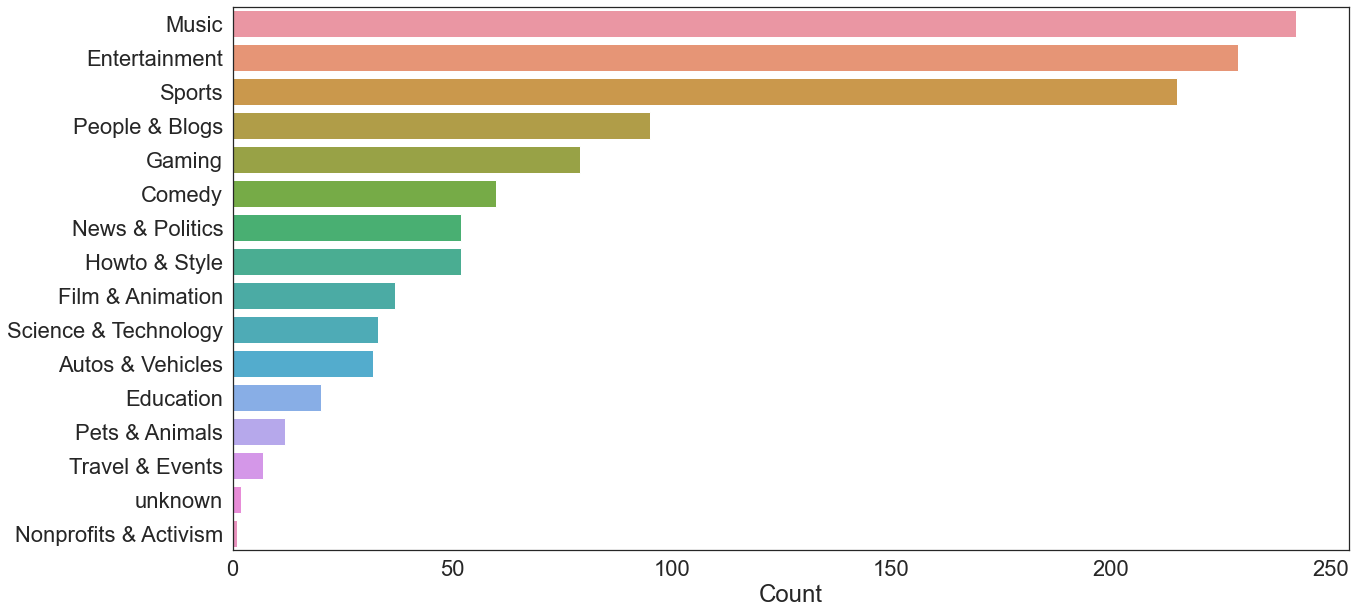

In [26]:
import seaborn as sns
from matplotlib import rcParams

# Some videos are listed multiple times because they are trending on different country's
# trending page
# Combine same duplicate rows
group = english_vids.groupby(['title','channelTitle','categories','categoryId','publishedAt','tags']).mean()
# Flatten labels
english_vidsall = group.reset_index()
# Set figure size
rcParams['figure.figsize'] = 20, 10
# Change font size
sns.set(font_scale=2)
# Make background white
sns.set_style("white")
# Count frequency
ax = sns.countplot(y="categories",data=english_vidsall, order = english_vidsall['categories'].value_counts().index)
# Change labels
ax.set_ylabel('')    
ax.set_xlabel('Count')


In [27]:
# Calculate log of dilikes and likes 
english_vids['logdis'] = np.log(english_vids['dislikes'])
english_vids['loglikes'] = np.log(english_vids['likes'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


### Plot 2: Distribution of likes and dislikes & categories

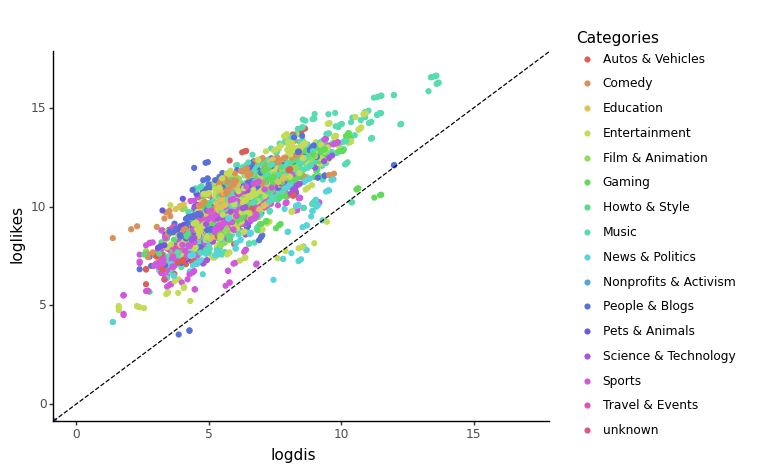

<ggplot: (7011352237)>

In [28]:
(ggplot(english_vids, aes(color='categories')) 
 + geom_point(aes(x='logdis',y='loglikes'))
 + theme_classic()
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
 + ylim(0,17)
 + xlim(0,17)
 + labs(color = 'Categories')
)
 

In [29]:
english_vids['total rating'] = english_vids['likes'] + english_vids['dislikes']
english_vids['logviews'] = np.log(english_vids['view_count'])
english_vids['lograting'] = np.log(english_vids['total rating'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


### Plot 3: Total rating vs views

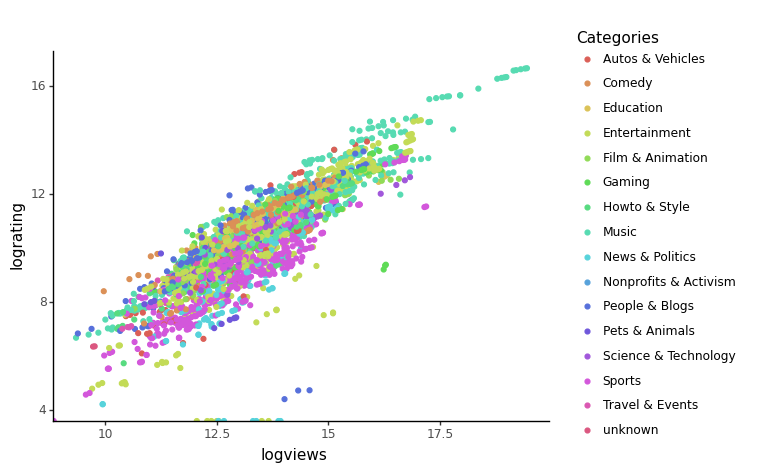

<ggplot: (7012236689)>

In [30]:
(ggplot(english_vids, aes(color='categories')) 
 + geom_point(aes(x='logviews',y='lograting'))
 + theme_classic()

 + labs(color = 'Categories')
)
 

### Plot 4 Ratings vs views for 'Entertainment' and 'News & Politics' categories

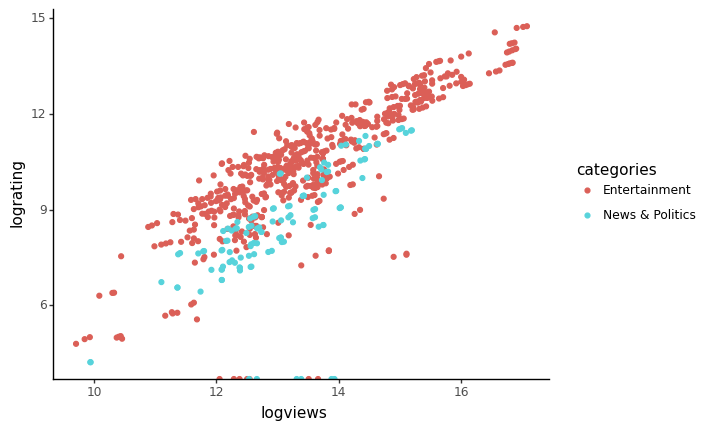

<ggplot: (7012608433)>

In [31]:
vids_e = english_vids[(english_vids.categories == 'Entertainment')]
vids_n = english_vids[(english_vids.categories == 'News & Politics')]
vids = vids_e.append(vids_n)
(ggplot(vids, aes(color='categories'))
 + geom_point(aes(x='logviews',y='lograting'))
 + theme_classic()
)
 

In [32]:
# Prepare data to create plot for channels producing multiple trending videos

# Count channel names using word counter
# Use combined df (no duplicates)
all_channels = english_vidsall['channelTitle']
counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

### Plot 5: Channels trending

<BarContainer object of 10 artists>

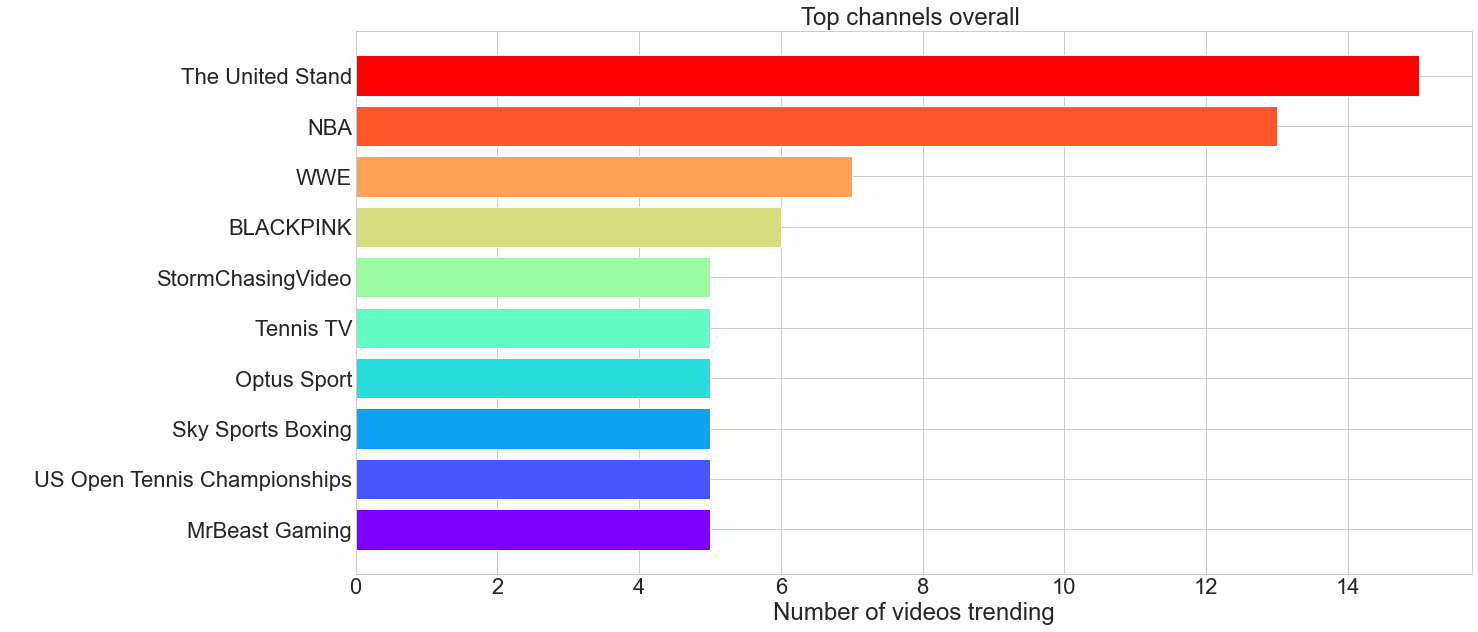

In [33]:
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top channels overall ')
plt.xlabel('Number of videos trending')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### The channel with the most trending videos "The United Stand"

The channel that has the most trending videos is 'The United Stand'. 

In [34]:
# Take a look at the titles and categories of videos by 'The United Stand'
english_vidsall[english_vidsall['channelTitle'].str.contains("The United Stand")][['title','view_count','categories']]

title  view_count  \
399   Harry Maguire Dropped? Sancho Transfer Forced!...   236173.00   
736   OFFICIAL! VAN DE BEEK Signs for Man Utd! Man U...   329849.00   
860            Sancho Transfer Update! Man Utd News Now   252004.00   
884   Solskjaer In Talks With Thiago! Sancho Deal Mo...   295604.00   
885   Solskjaer's 100 Million Transfer Race Begins! ...   259391.00   
985   Thiago AND Upamecano AFTER Van De Beek Officia...   311281.00   
987   Thiago Transfer Hope! Alexis Sanchez Slams Uni...   198627.00   
1024  United Back In for 75 Million Grealish! Man Ut...   157532.00   
1025  United Shock Transfer Statement! Messi Transfe...   227243.00   
1026  United Start Spending! Maguire & Messi Latest!...   350803.50   
1027  United Transfers Incoming! Stand By Harry Magu...   242678.00   
1028  Upamecano and Messi Transfer Blow! Man Utd Tra...   218339.00   
1033  Van De Beek Confirms United Switch! Man Utd Tr...   314042.50   
1034  Van De Beek Done SANCHO In Next! Man Utd Trans...   310090.00   
1035  Van De Beek Here We Go Fabrizio Romano! Man Ut...   412920.75   

         categories  
399   Entertainment  
736          Sports  
860          Sports  
884          Sports  
885   Entertainment  
985          Sports  
987          Sports  
1024  Entertainment  
1025  Entertainment  
1026         Sports  
1027         Sports  
1028         Sports  
1033         Sports  
1034         Sports  
1035         Sports

### Plot 6 Views of trending videos

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


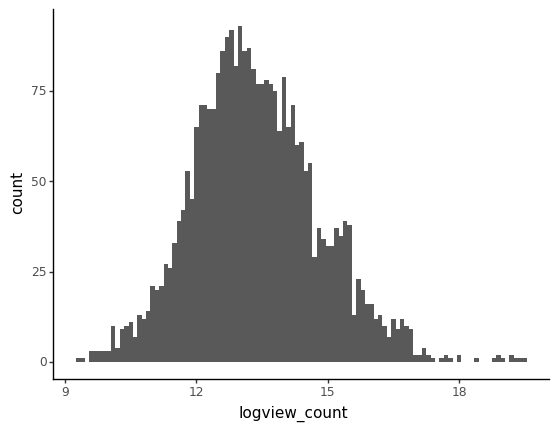

<ggplot: (7013564717)>

In [35]:
english_vids['logview_count'] = np.log(english_vids['view_count'])
(ggplot(english_vids, aes(x='logview_count')) 
 + geom_histogram(binwidth=0.1)
 + theme_classic()
)

### Video with the lowest views

In [36]:
mincount = min(english_vids['view_count'])
english_vids[(english_vids.view_count == mincount)]

title      channelTitle  \
2856    [Full Event] ONE Championship: A NEW BREED  ONE Championship   
2967  🔴 [Live in HD] ONE Championship: A NEW BREED  ONE Championship   

     categories  categoryId trending_date  \
2856     Sports          17      20.01.09   
2967     Sports          17      20.29.08   

                                                   tags           publishedAt  \
2856  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...  2020-08-28T15:13:21Z   
2967  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...  2020-08-28T15:13:21Z   

      view_count  likes  dislikes  logdis  loglikes  total rating  logviews  \
2856         0.0    0.0       0.0    -inf      -inf           0.0      -inf   
2967         0.0    0.0       0.0    -inf      -inf           0.0      -inf   

      lograting  logview_count  
2856       -inf           -inf  
2967       -inf           -inf

Views as low as 11442 was on the trending page

In [37]:
# Calculated liked ratio
english_vids['likedratio'] = english_vids['likes']/(english_vids['likes']+english_vids['dislikes']+0.1)

In [38]:
# Videos from each day
df_0901 = english_vids[(english_vids.trending_date == '20.01.09')]
df_0902 = english_vids[(english_vids.trending_date == '20.02.09')]
df_0903 = english_vids[(english_vids.trending_date == '20.03.09')]
df_0904 = english_vids[(english_vids.trending_date == '20.04.09')]

In [39]:
# Videos from category "News & Politics"
df_n = english_vids[(english_vids.categories=='News & Politics')]
df_n.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 26th
df_n26 = df_n[(df_n.trending_date == '20.26.08')]
df_n26.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 27th
df_n27 = df_n[(df_n.trending_date == '20.27.08')]
df_n27.reset_index(drop=True, inplace=True)

In [40]:
# Videos from category "Entertainment"
df_e = english_vids[(english_vids.categories=='Entertainment')]
df_e.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 26th
df_e26 = df_e[(df_e.trending_date == '20.26.08')]
df_e26.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 27th
df_e27 = df_e[(df_e.trending_date == '20.27.08')]
df_e27.reset_index(drop=True, inplace=True)

In [41]:
# Videos from category "Entertainment" from August 29th
df_e29 = df_e[(df_e.trending_date == '20.29.08')]
df_e29.reset_index(drop=True, inplace=True)

In [42]:
# Videos from category "News & Politics" from August 29th
df_n29 = df_n[(df_n.trending_date == '20.29.08')]
df_n29.reset_index(drop=True, inplace=True)

In [43]:
# Videos from category "Entertainment" from sep 01
df_e901 = df_e[(df_e.trending_date == '20.01.09')]
df_e901.reset_index(drop=True, inplace=True)

In [44]:
# Videos from category "Entertainment" from sep 02
df_e902 = df_e[(df_e.trending_date == '20.02.09')]
df_e902.reset_index(drop=True, inplace=True)

In [45]:
# Videos from category "Entertainment" from sep 03
df_e903 = df_e[(df_e.trending_date == '20.03.09')]
df_e903.reset_index(drop=True, inplace=True)

In [46]:
# Videos from category "Entertainment" from sep 04
df_e904 = df_e[(df_e.trending_date == '20.04.09')]
df_e904.reset_index(drop=True, inplace=True)

In [47]:
# Create a wordcloud

In [48]:
# Words NOT to include in wordcloud or the frequency plot 
# (add some to defult STOPWORDS list from wordcloud)
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('I')
stopwords.add('(day')
stopwords.add('|')
stopwords.add('new')
stopwords.add('none')
stopwords.add('[none]')
stopwords.add('-')
stopwords.add('news')
stopwords.add('&')

In [49]:
# Some videos tag the same words multiple times 
# And that may skew the wordcloud or the word frequency results.
# Here, the number of times each word is used in each cell is used in tags

# First, combine video duplicates (from 3 different days)

english_vidscombined = english_vids.groupby(['title','channelTitle','tags']).mean().reset_index()


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(english_vidscombined))
titles = english_vidscombined['tags'].str.lower()
for r in rows:
    str_incell = ''.join(titles[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])

In [50]:
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()

In [51]:
# Maximum number of times a word was tagged for the same video
maxcount = max(word_count_in_eachcell2['count'])
str(maxcount)

'29.0'

In [52]:
word_count_in_eachcell2[(word_count_in_eachcell2['count']==maxcount)]

words  row  count
7025  faze  481   29.0

The word 'faze' is tagged 29 times for a single video! This will definately skew the wordcloud result.

In [53]:
# Removing duplicates (same multiple tags for the same video) by just using the word list

# Shuffle order first
word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
# Then combine the words column as a string
str_a = ' '.join(word_count_in_eachcell3['words']) 

### Plot 7 Wordcloud for all videos for 08/26/2020, 08/27/2020, 08/29/2020, and 09/01/2020

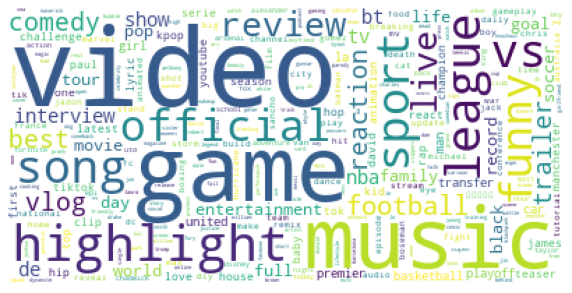

In [54]:
# Create wordcould with the words extracted
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(str_a)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
# Save as a different name to use later 
allwords = word_count_in_eachcell3

## News & Politics 

## "News & Politics" category  8/26/20

### Plot 8 Wordcloud for "News & Politics" category on 8/26/20

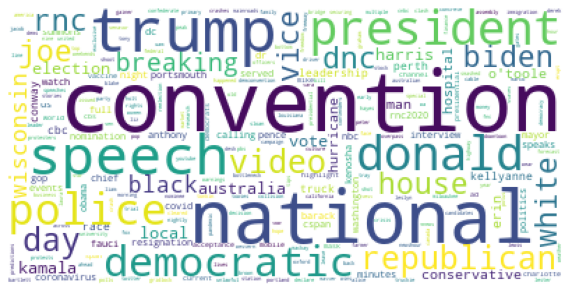

In [56]:
# Remove duplicate tags for same videos

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of news and politics dataframe for the 26th
rows = range(0, len(df_n26))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_n26['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_n26['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 9 Popular words used as titles and tags in the  "News & Politics" category on 8/26/20 was related to the Republican National Convention

<BarContainer object of 10 artists>

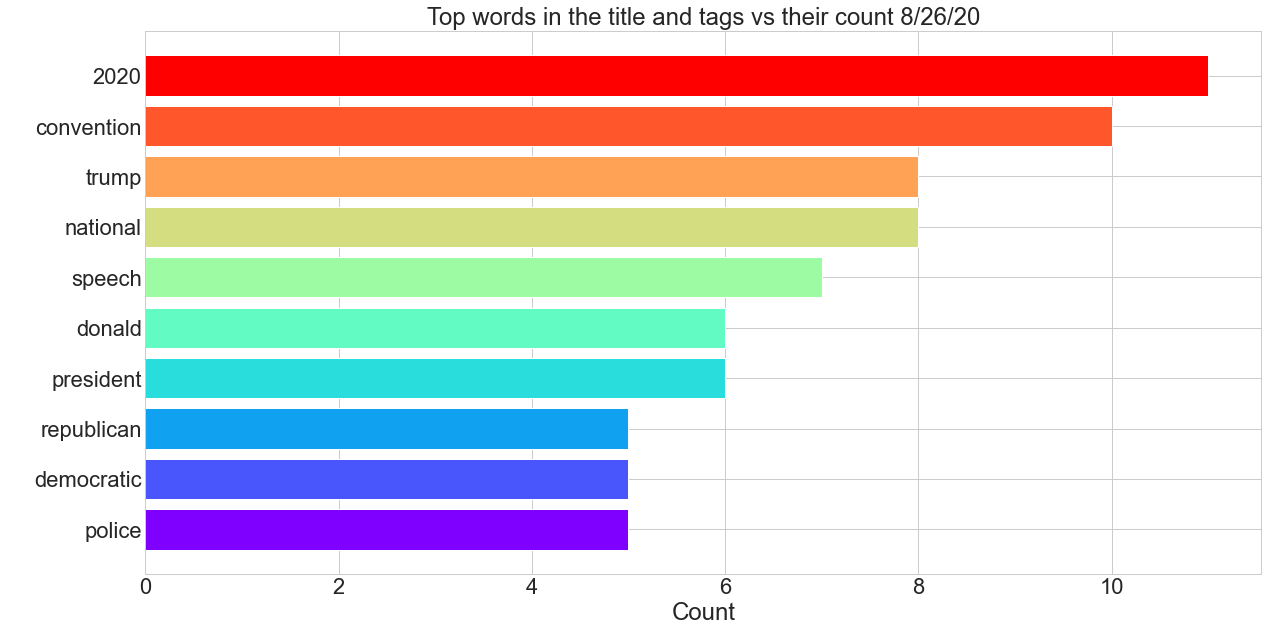

In [57]:
# Take a look at which words were popular in tags in video titles on the 26th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 8/26/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [58]:


kw_list = ['Republican National Convention','Democratic National Convention']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-31',geo='US',gprop='')
convention = pytrends.interest_over_time()
convention2 = convention
convention2 = convention2.reset_index()
convention2.columns = ['day','Republican National Convention','Democratic National Convention','ispartial']
convention2 = pd.melt(convention2, id_vars = ['day'], value_vars = ['Republican National Convention','Democratic National Convention'])
convention2.columns = ['day','term','count']

### Plot 10 Google interest over time for "Republican National Convention" and "Democratic National Convention"

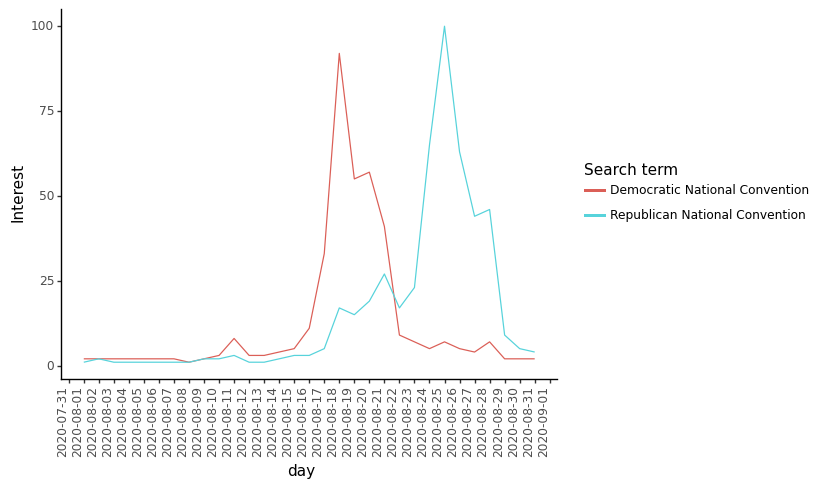

<ggplot: (7014263749)>

In [59]:
(ggplot(convention2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest') 
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')

)

Democratic national convention was held 8/17-8/20. Republican national convention was held 8/24-8/27.

### Videos trending on 8/26/20 with tags related to political party conventions

In [60]:
republican_title = df_n26[df_n26['title'].str.contains("republican", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
republican_tags = df_n26[df_n26['tags'].str.contains("republican", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
convention_title = df_n26[df_n26['title'].str.contains("convention", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
convention_tags = df_n26[df_n26['tags'].str.contains("convention", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
RNC_title = df_n26[df_n26['title'].str.contains("RNC", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
RNC_tags = df_n26[df_n26['tags'].str.contains("RNC", case=False)][['title','channelTitle','tags','publishedAt','view_count']]

republican = republican_title.append(republican_tags)
republican = republican.append(convention_title)
republican = republican.append(convention_tags)
republican = republican.append(RNC_title)
republican = republican.append(RNC_tags)

republican = republican.groupby(['title','channelTitle','tags','publishedAt']).mean()
republican = republican.sort_values(by = 'view_count',ascending=False)
republican.reset_index()

title  channelTitle  \
0  Watch Barack Obama’s Full Speech At The 2020 D...      NBC News   
1  Trump speaks at RNC after securing 2020 GOP no...      Fox News   
2  WATCH: Kamala Harris’ full speech at the 2020 ...  PBS NewsHour   
3             Republican National Convention (Day 2)        C-SPAN   
4             Republican National Convention (Day 1)        C-SPAN   
5  Joe Biden speech at the Democratic Convention ...     Joe Biden   

                                                tags           publishedAt  \
0  Desk Video|News|Politics|Decision 2020|2020 Co...  2020-08-20T03:31:29Z   
1  Fox News Channel|Fox News|News|FNC|breaking ne...  2020-08-24T17:49:46Z   
2  dnc|democratic national convention|joe biden|v...  2020-08-20T03:41:13Z   
3  C-SPAN|CSPAN|2020|RNC|RNC2020|Charlotte|Washin...  2020-08-26T03:19:21Z   
4  C-SPAN|CSPAN|2020|RNC|RNC2020|Charlotte|Washin...  2020-08-25T03:07:30Z   
5  joe biden|biden|joe biden ad|biden ad|joe bide...  2020-08-21T04:00:56Z   

   view_count  
0   3230539.0  
1   1252393.0  
2    913674.0  
3    905838.0  
4    886515.0  
5    458618.0

Republican national convention trending real time, democratic national convention trending a week after.

### Videos trending on 8/26/20 with tags or titles with 'police'

In [61]:
police_title = df_n26[df_n26['title'].str.contains("police", case=False)][['title','channelTitle','tags','view_count']]
police_tags = df_n26[df_n26['tags'].str.contains("police", case=False)][['title','channelTitle','tags','view_count']]


police = police_title.append(police_tags)
police = police.append(police_title)


police = police.groupby(['title','channelTitle']).mean()
police = police.sort_values(by = 'view_count',ascending=False)
police.reset_index()

title      channelTitle  \
0  29-year-old Black man in Wisconsin hospital af...  CBS This Morning   
1  Protests erupt after police shoot a Black man ...   CNBC Television   
2  Portsmouth Vice Mayor served summons after cal...        WAVY TV 10   
3  Portsmouth's vice mayor served summons after c...        WAVY TV 10   

   view_count  
0   1769771.0  
1    410044.0  
2    181940.0  
3     87156.0

### Plot 11 Number of likes for videos trending in the "News & Politics" category on 8/26/20 

<BarContainer object of 16 artists>

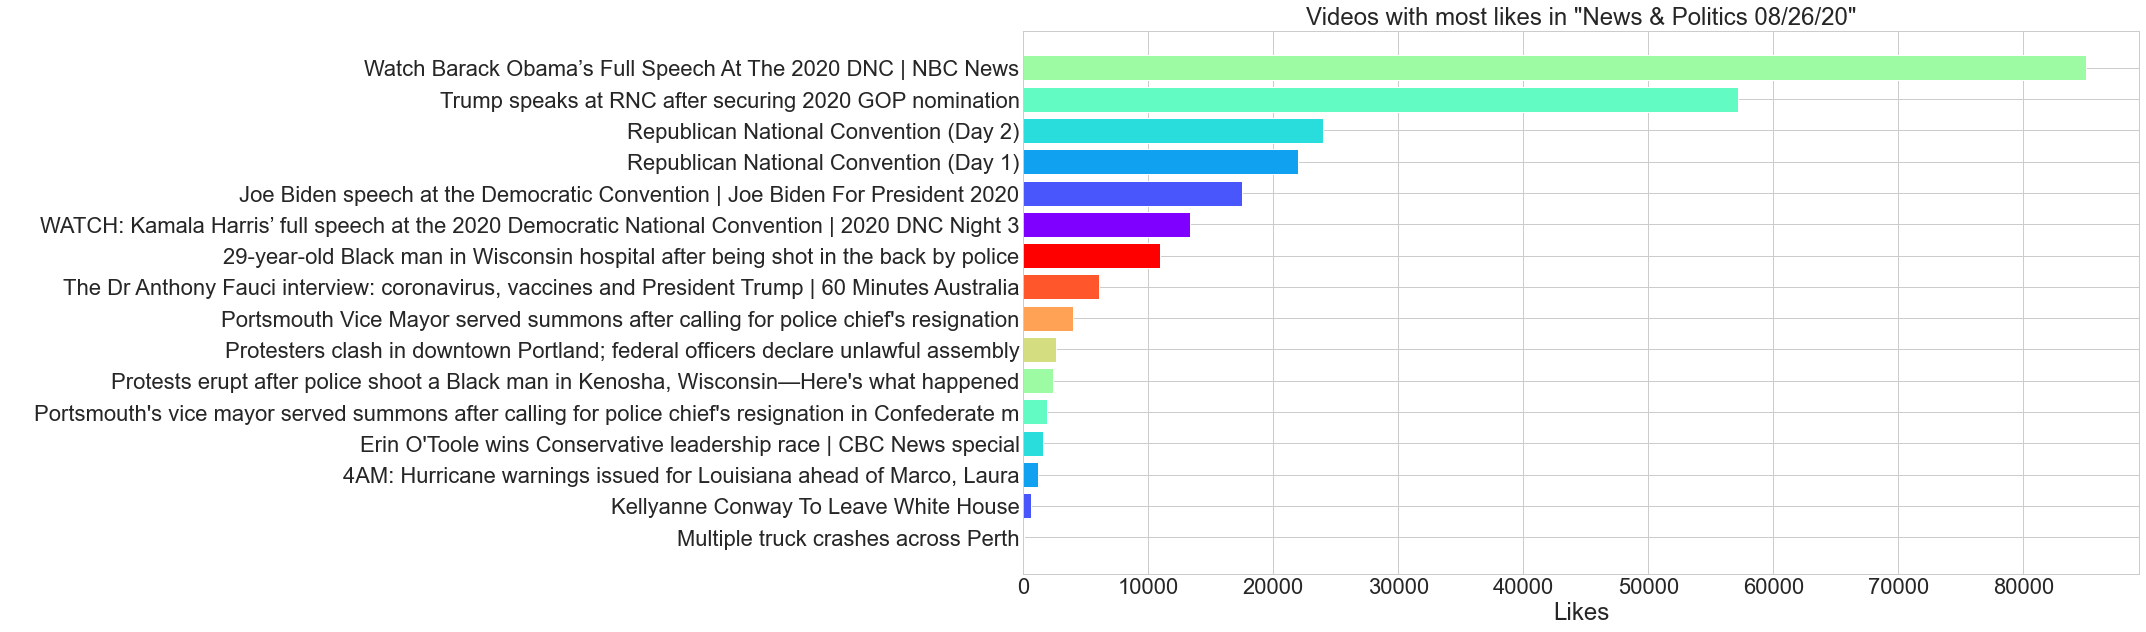

In [62]:
# take a look at which videos were rated highly

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Videos with most likes in "News & Politics 08/26/20"')
plt.xlabel('Likes')
plt.ylabel(' ')
df_n26 = df_n26.sort_values(by=['likes'],ascending=True)
df_n26.reset_index(drop=True, inplace=True)
plt.barh(df_n26['title'], df_n26['likes'], color=colors)




The most liked video was Barack Obama’s Full Speech.

### Plot 12 Number of views for videos trending in the "News & Politics" category on 8/26/20 

<BarContainer object of 16 artists>

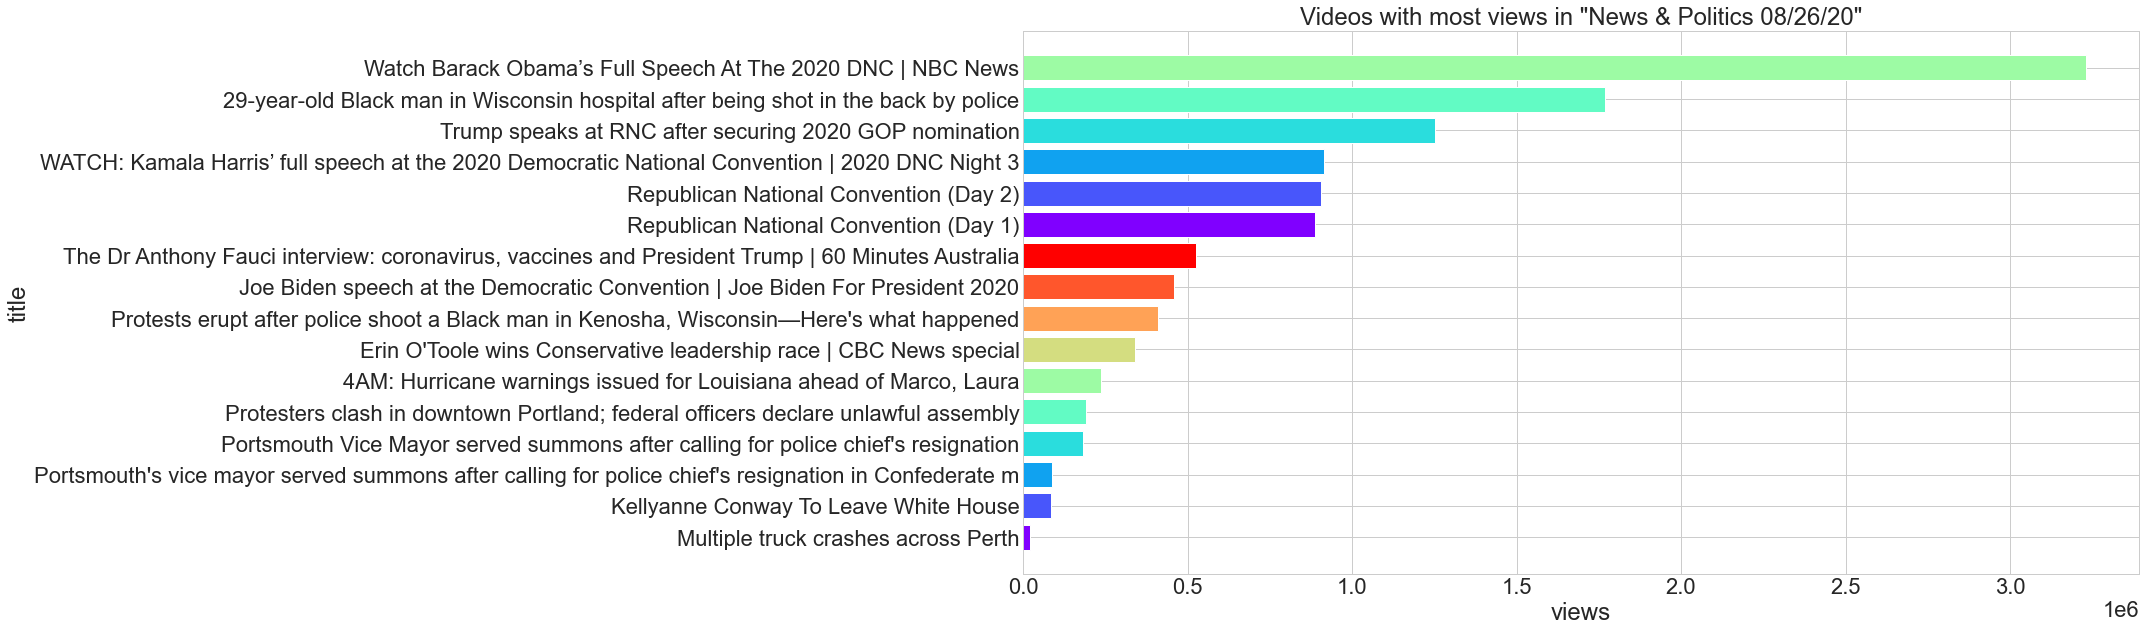

In [63]:
# take a look at which videos were viewed the most
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Videos with most views in "News & Politics 08/26/20"')
plt.xlabel('views')
plt.ylabel('title')
df_n26 = df_n26.sort_values(by=['view_count'],ascending=True)
df_n26.reset_index(drop=True, inplace=True)
plt.barh(df_n26['title'], df_n26['view_count'], color=colors)





The most viewed video was Barack Obama’s Full Speech.

## "News & Politics" category  8/27/20

### Plot 13 Wordcloud for "News & Politics" category on 8/27/20

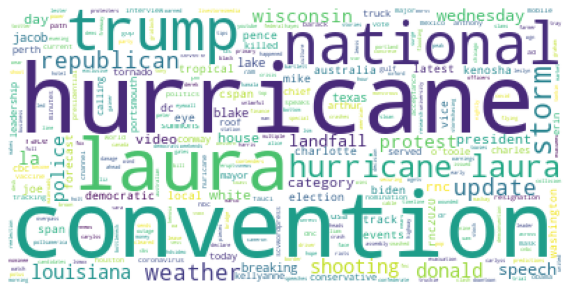

In [66]:
# Remove duplicate tags for same videos

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of news and politics dataframe for the 27th
rows = range(0, len(df_n27))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_n27['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_n27['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 14 Popular words for "News & Politics" category on 8/27/20 was related to Hurricane Laura

<BarContainer object of 20 artists>

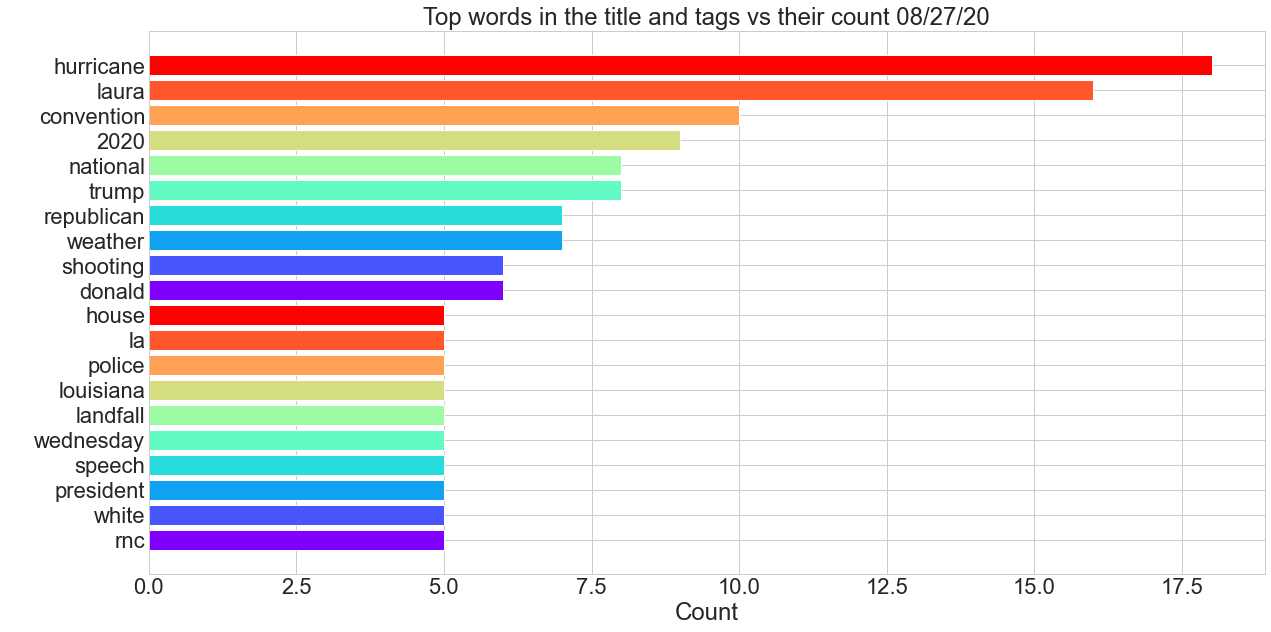

In [67]:
# Take a look at which words were popular in tags in video titles on the 27th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/27/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [68]:
import pandas as pd 
from pytrends.request import TrendReq
import datetime as dt

kw_list = ['Hurricane Laura','Jacob Blake']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-18 2020-08-31',geo='US',gprop='')
hurricaneblake = pytrends.interest_over_time()
hurricaneblake2 = hurricaneblake
hurricaneblake2 = hurricaneblake2.reset_index()
hurricaneblake2.columns = ['day','Hurricane Laura','Jacob Blake','ispartial']
hurricaneblake2 = pd.melt(hurricaneblake2, id_vars = ['day'], value_vars = ['Hurricane Laura','Jacob Blake'])
hurricaneblake2.columns = ['day','term','count']

### Plot 15 Google interest over time for "Hurricane Laura" and "Jacob Blake"

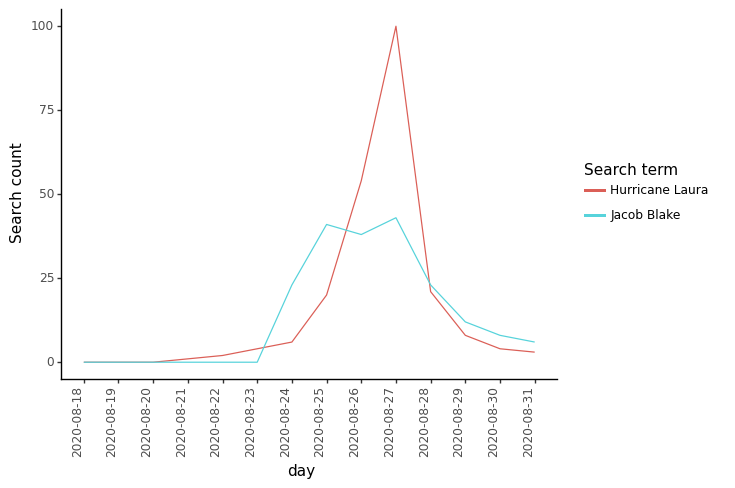

<ggplot: (7014130129)>

In [69]:
(ggplot(hurricaneblake2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Search count')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

### Trending videos on 8/27/20 with "hurricane laura" in their title or tags.

In [70]:
hurricane_title = df_n27[df_n27['title'].str.contains("hurricane", case=False)][['title','channelTitle','publishedAt','view_count']]
hurricane_tags = df_n27[df_n27['tags'].str.contains("hurricane", case=False)][['title','channelTitle','publishedAt','view_count']]
laura_title = df_n27[df_n27['title'].str.contains("laura", case=False)][['title','channelTitle','publishedAt','view_count']]
laura_tags = df_n27[df_n27['tags'].str.contains("laura", case=False)][['title','channelTitle','publishedAt','view_count']]

hurricane = hurricane_title.append(hurricane_tags)
hurricane = hurricane.append(laura_title)
hurricane = hurricane.append(laura_tags)


hurricane = hurricane.groupby(['title','channelTitle','publishedAt']).mean()
hurricane = hurricane.sort_values(by = 'view_count',ascending=False)
hurricane.reset_index()

title  \
0  Wednesday 4 pm update: Monstrous Hurricane Lau...   
1  Hurricane Laura makes landfall in Cameron, Lou...   
2  4AM: Hurricane warnings issued for Louisiana a...   
3  Hurricane Laura Eyewall Slams Carlyss, LA - 8/...   
4      08-27-2020 Lake Charles, LA - Hurricane Laura   
5     Hurricane Laura sends hotel roof pieces flying   
6  Wednesday 7am update: Major Hurricane Laura he...   
7  Hurricane Laura, Lake Arthur, LA Tornado Warne...   
8  Hurricane Laura latest updates as it nears lan...   

                           channelTitle           publishedAt  view_count  
0                                 WWLTV  2020-08-26T21:17:32Z    277015.0  
1                         ABC13 Houston  2020-08-27T06:42:26Z    239318.0  
2                                 WWLTV  2020-08-23T10:29:31Z    238787.0  
3                     StormChasingVideo  2020-08-27T09:11:27Z    202528.0  
4                     Live Storms Media  2020-08-27T06:48:36Z    201837.0  
5                         ABC13 Houston  2020-08-27T09:23:43Z    181287.0  
6                                 WWLTV  2020-08-26T12:30:41Z    177105.0  
7                     StormChasingVideo  2020-08-26T19:25:23Z    150065.0  
8  KENS 5: Your San Antonio News Source  2020-08-26T22:31:33Z    125680.0

### Trending videos on 8/27/20 with " Jacob Blake " in their title or tags.

In [71]:
jacob_title = df_n27[df_n27['title'].str.contains("jacob", case=False)][['title','channelTitle','publishedAt','view_count']]
jacob_tags = df_n27[df_n27['tags'].str.contains("jacob", case=False)][['title','channelTitle','publishedAt','view_count']]
blake_title = df_n27[df_n27['title'].str.contains("blake", case=False)][['title','channelTitle','publishedAt','view_count']]
blake_tags = df_n27[df_n27['tags'].str.contains("blake", case=False)][['title','channelTitle','publishedAt','view_count']]

jacob = jacob_title.append(jacob_tags)
jacob = jacob.append(blake_title)
jacob = jacob.append(blake_tags)


jacob = jacob.groupby(['title','channelTitle','publishedAt']).mean()
jacob = jacob.sort_values(by = 'view_count',ascending=False)
jacob.reset_index()

title channelTitle  \
0  2 killed, 1 wounded at protests in Wisconsin o...     WGN News   
1  Jacob Blake shooting timeline: What events led...    USA TODAY   

            publishedAt  view_count  
0  2020-08-26T11:32:01Z    939633.0  
1  2020-08-26T22:24:40Z    569237.0

Jacob Blake was shot on 8/23. Protests happened the next day. 2 people killed at protests on 8/25. These videos are trending real time.

### Plot 16 Views for "News & Politics" category on 8/27/20

<BarContainer object of 26 artists>

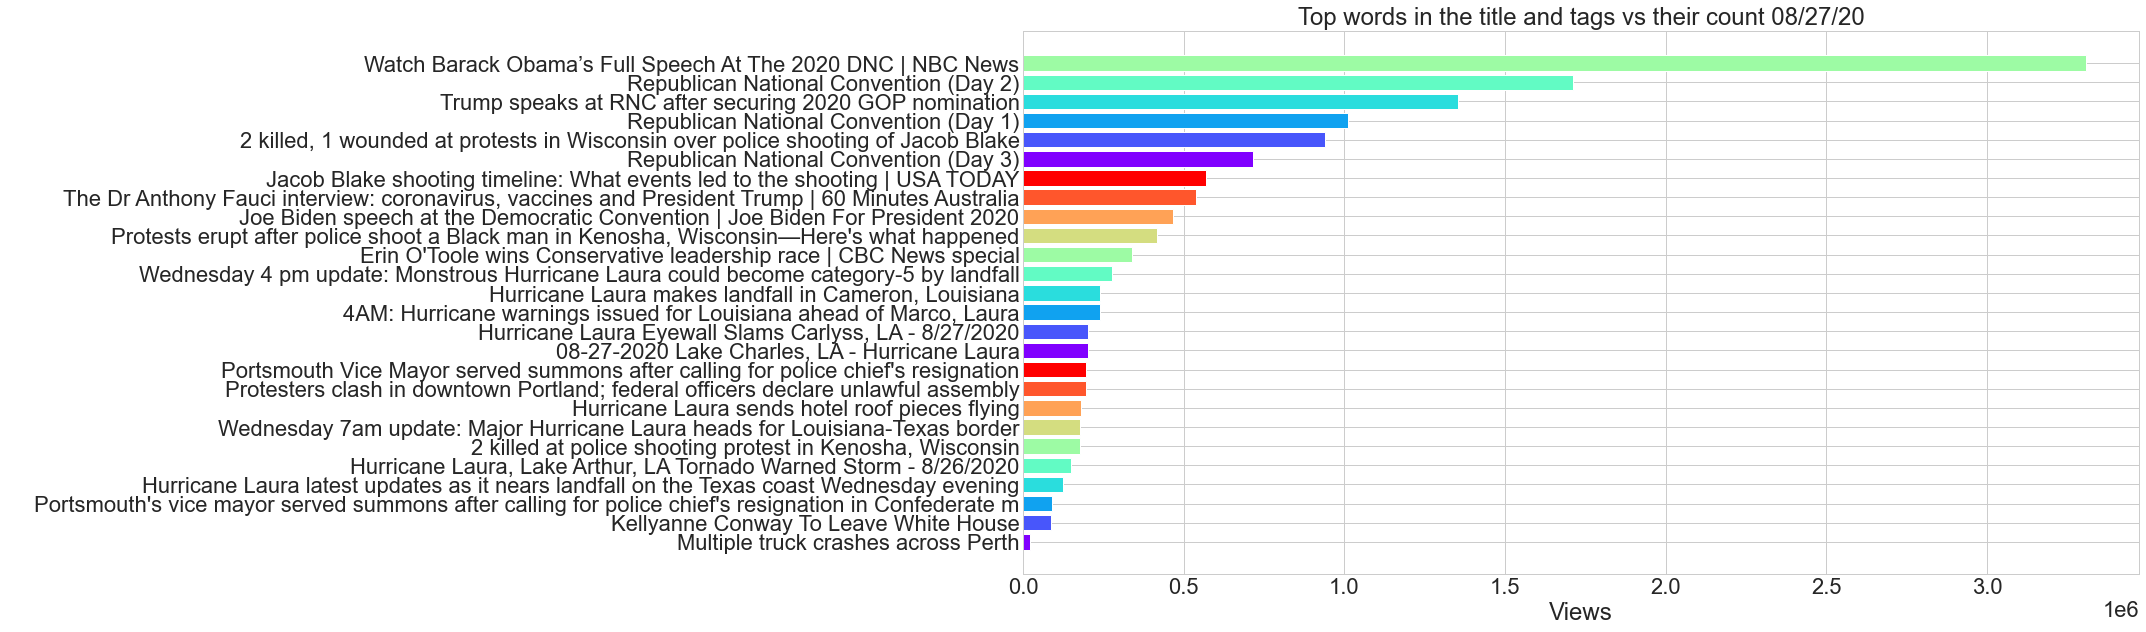

In [72]:
# take a look at which videos were viewed the most
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/27/20')
plt.xlabel('Views')
plt.ylabel(' ')


df_n27 = df_n27.sort_values(by=['view_count'],ascending=True)
df_n27.reset_index(drop=True, inplace=True)
plt.barh(df_n27['title'], df_n27['view_count'], color=colors)



### Plot 17 Channels with multiple trending videos across days in the "News & Politics" category

<BarContainer object of 10 artists>

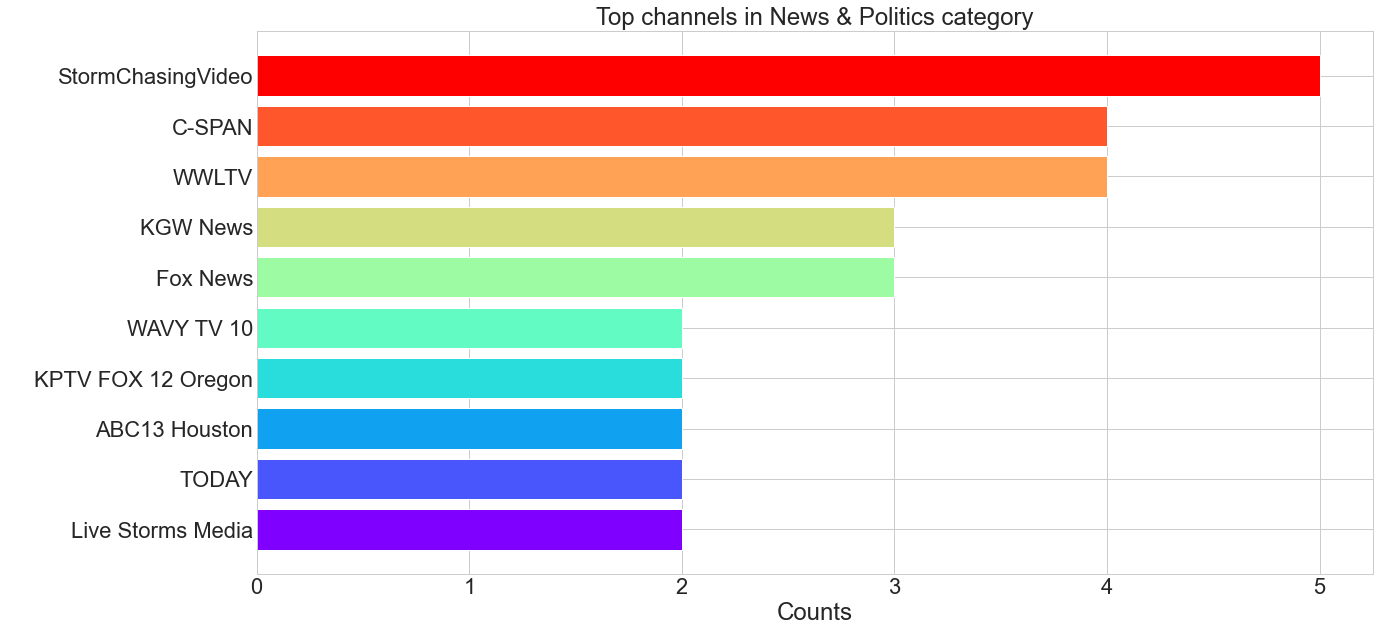

In [73]:
# Combine same videos (two videos are in the df twice for 26th and 27th)
group = df_n.groupby(['title','channelTitle','categories','categoryId','tags']).mean()
df_nall = group.reset_index()

all_channels = df_nall['channelTitle']

counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
    
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top channels in News & Politics category')
plt.xlabel('Counts')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

## Entertainment 

## "Entertainment" category 8/26/20

### Plot 18 Wordcloud for "Entertainment" category on 8/26/20

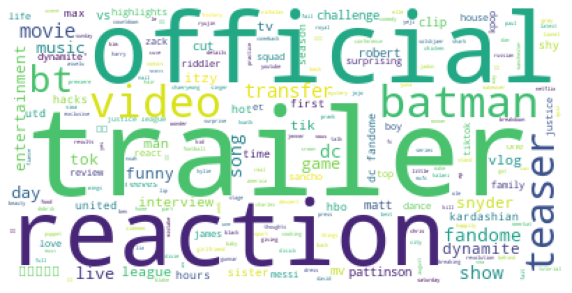

In [74]:
# Create a word cloud for "Entertainment" category from August 26th

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of entertainment dataframe for the 26th
rows = range(0, len(df_e26))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_e26['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_e26['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Plot 19 The popular words used in titles and tags for "Entertainment" category on 8/26/20 was "trailer"

<BarContainer object of 10 artists>

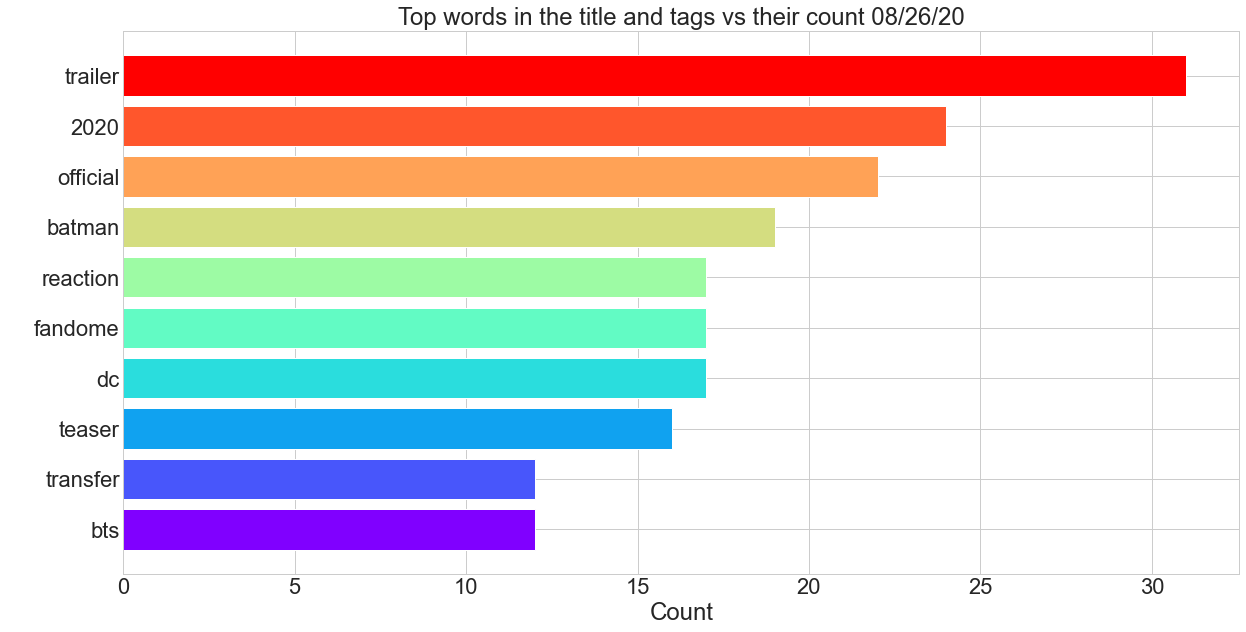

In [75]:
# Take a look at which words were popular in tags in video titles on the 26th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/26/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### Videos trending on 8/26/20 with tags or title "trailer"

In [76]:
trailer_title = df_e26[df_e26['title'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]
trailer_tags = df_e26[df_e26['tags'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]

trailer = trailer_title.append(trailer_tags)
trailer = trailer.append(trailer_title)
trailer = trailer.append(trailer_tags)


trailer = trailer.groupby(['title','channelTitle','publishedAt']).mean()
trailer = trailer.sort_values(by = 'view_count',ascending=False)
trailer26 = trailer.reset_index()
trailer26

title        channelTitle  \
0                         ITZY Not Shy Stage Practice                ITZY   
1   Suicide Squad: Kill the Justice League Officia...                  DC   
2           Enola Holmes | Official Trailer | Netflix             Netflix   
3             Gotham Knights - World Premiere Trailer                  DC   
4   The Comey Rule (2020) Official Trailer | SHOWT...            SHOWTIME   
5   The Batman Trailer 2021 Breakdown and Easter E...   Emergency Awesome   
6         The Batman - Official Trailer (My Thoughts)        Jeremy Jahns   
7            Raised by Wolves | New Trailer | HBO Max             HBO Max   
8   THE BATMAN Trailer Breakdown! Riddler Clue SOL...       New Rockstars   
9   Justice League: The Snyder Cut - Official Trai...        Jeremy Jahns   
10  THE BATMAN TRAILER REACTION! Robert Pattinson ...       New Rockstars   
11                        The Batman Trailer REACTION  Beyond The Trailer   
12            The Batman | DC Fandome Teaser Reaction           Hyper RPG   
13    Sneaky Details You Missed In The Batman Trailer              Looper   
14      Zack Snyder's Justice League Trailer REACTION  Beyond The Trailer   
15       Official Trailer | Doctor Who: Time Fracture          Doctor Who   
16  THE BATMAN Teaser Trailer Reaction & Thoughts ...   Black Nerd Comedy   
17  Zack Snyder’s Justice League | Official Teaser...          Blind Wave   

             publishedAt  view_count  
0   2020-08-19T09:00:00Z   7155425.0  
1   2020-08-23T00:19:51Z   4481604.0  
2   2020-08-25T12:30:00Z   3267148.0  
3   2020-08-22T17:34:48Z   2222329.0  
4   2020-08-24T13:00:04Z   1558989.0  
5   2020-08-23T02:25:51Z   1220683.0  
6   2020-08-23T06:20:53Z    911846.0  
7   2020-08-24T15:30:47Z    792296.0  
8   2020-08-24T20:47:15Z    624044.0  
9   2020-08-23T02:54:52Z    585168.0  
10  2020-08-23T03:35:14Z    547273.0  
11  2020-08-23T01:39:43Z    470616.5  
12  2020-08-23T08:27:42Z    341624.5  
13  2020-08-23T20:00:06Z    293788.0  
14  2020-08-22T22:37:44Z    238880.0  
15  2020-08-21T08:59:54Z    233353.0  
16  2020-08-23T04:55:03Z    206859.0  
17  2020-08-23T19:30:01Z    178592.0

In [77]:
kw_list = ['trailer','Batman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
batmanvstrailer = pytrends.interest_over_time()
batmanvstrailer2 = batmanvstrailer
batmanvstrailer2 = batmanvstrailer2.reset_index()
batmanvstrailer2.columns = ['day','trailer','Batman','ispartial']
batmanvstrailer2 = pd.melt(batmanvstrailer2, id_vars = ['day'], value_vars = ['trailer','Batman'])
batmanvstrailer2.columns = ['day','term','count']

### Plot 20 Google interest over time for "Batman" and "trailer"

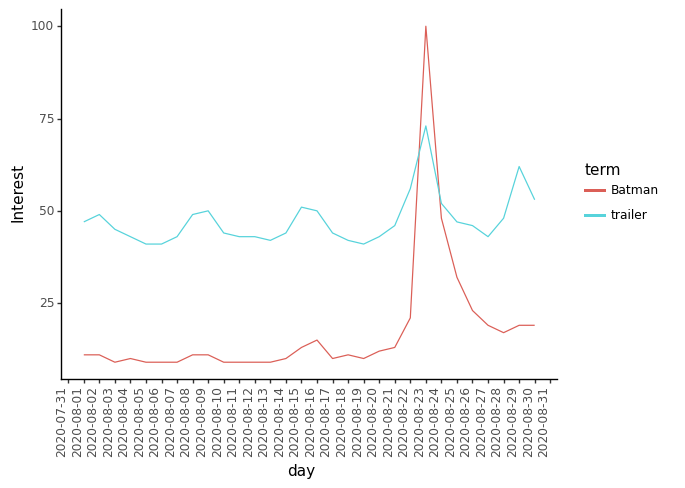

<ggplot: (7011983305)>

In [78]:
(ggplot(batmanvstrailer2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

Most of the trending movie trailers were published 8/22-23, and the reaction videos were pulished 1-2 days after.

### Plot 21 Top liked videos in the  "Entertainment" category on 8/26/20

<BarContainer object of 19 artists>

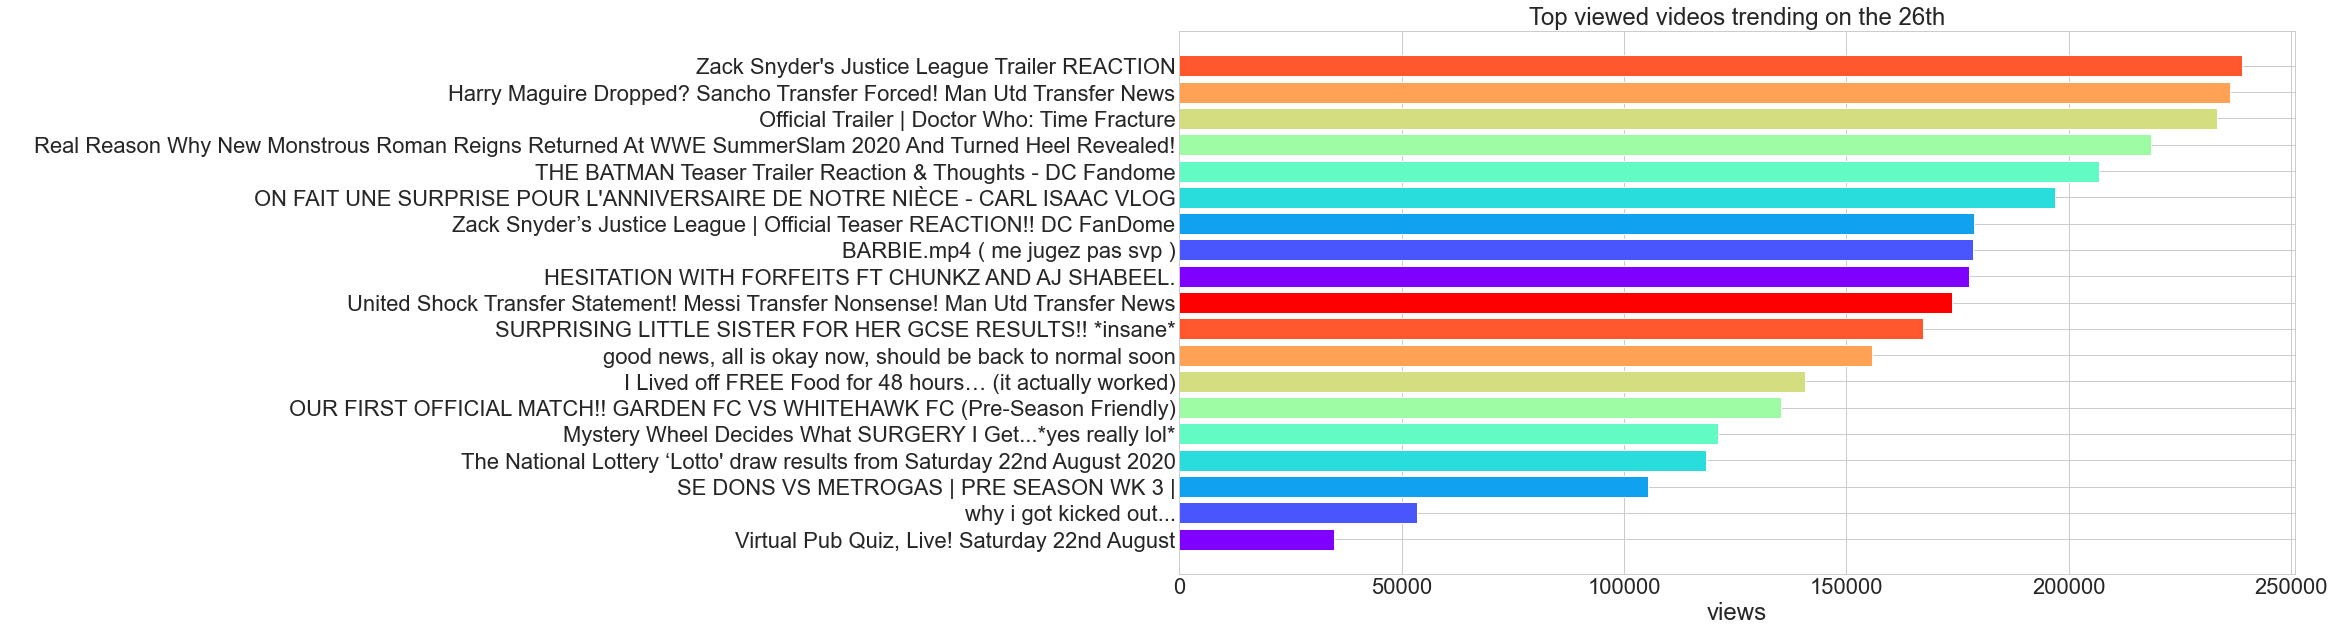

In [79]:
# take a look at which videos were viewed the most
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

plt.title('Top viewed videos trending on the 26th')
plt.xlabel('views')
plt.ylabel(' ')

df_e26 = df_e26.sort_values(by=['view_count'],ascending=True)
df_e26.reset_index(drop=True, inplace=True)
df_e26_top = df_e26[1:20]
plt.barh(df_e26_top['title'], df_e26_top['view_count'], color=colors)

### Plot 22 Wordcloud for "Entertainment" category on 8/27/20

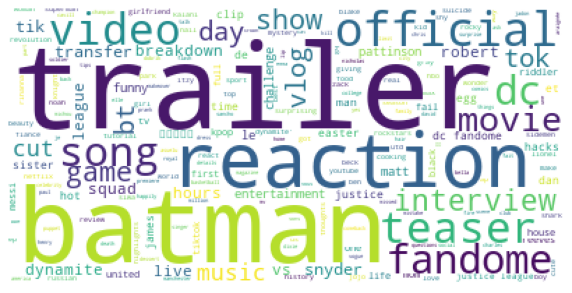

In [80]:
# Create wordcloud for Entertainment on the 27th
# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of entertainment dataframe for the 26th
rows = range(0, len(df_e27))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_e27['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_e27['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 23 Popular word used in titles and tags for "Entertainment" category on 8/27/20 was “trailer” and "Batman"

<BarContainer object of 10 artists>

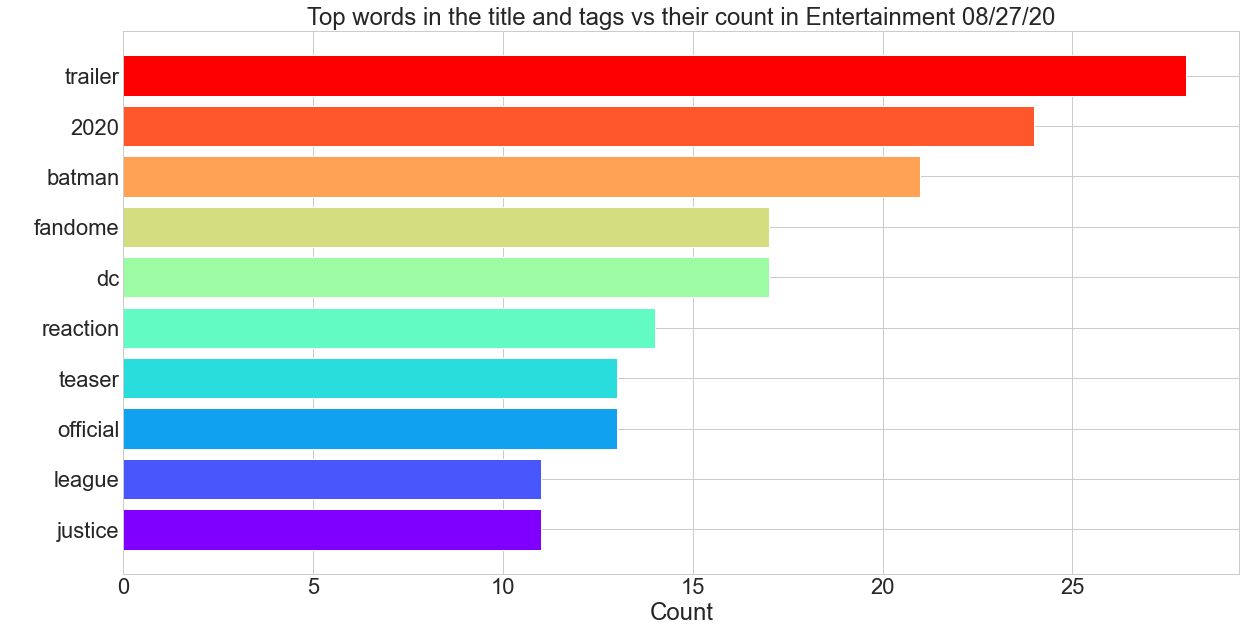

In [81]:
# Take a look at which words were popular in tags in video titles on the 27th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/27/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### All videos with word "trailer" in title or tags trending on 26 or 27th

In [82]:
trailer_title = df_e27[df_e27['title'].str.contains("trailer", case=False)][['title','channelTitle','view_count']]
trailer_tags = df_e27[df_e27['tags'].str.contains("trailer", case=False)][['title','channelTitle','view_count']]

trailer = trailer_title.append(trailer_tags)
trailer = trailer.append(trailer_title)
trailer = trailer.append(trailer_tags)


trailer = trailer.groupby(['title','channelTitle']).mean()
trailer = trailer.sort_values(by = 'view_count',ascending=False)
trailer27 = trailer.reset_index()

df = pd.merge(trailer26,trailer27, on='title',how='outer', indicator=True)
df = df[['title','channelTitle_x','channelTitle_y','_merge']]

df = df.replace(regex=['right_only'],value='only 27th')
df = df.replace(regex=['left_only'],value='only 26th')
df.columns = ['title','channelTitle_x','channelTitle_y','trending date']
df

title      channelTitle_x  \
0                         ITZY Not Shy Stage Practice                ITZY   
1   Suicide Squad: Kill the Justice League Officia...                  DC   
2           Enola Holmes | Official Trailer | Netflix             Netflix   
3             Gotham Knights - World Premiere Trailer                  DC   
4   The Comey Rule (2020) Official Trailer | SHOWT...            SHOWTIME   
5   The Batman Trailer 2021 Breakdown and Easter E...   Emergency Awesome   
6         The Batman - Official Trailer (My Thoughts)        Jeremy Jahns   
7            Raised by Wolves | New Trailer | HBO Max             HBO Max   
8   THE BATMAN Trailer Breakdown! Riddler Clue SOL...       New Rockstars   
9   Justice League: The Snyder Cut - Official Trai...        Jeremy Jahns   
10  THE BATMAN TRAILER REACTION! Robert Pattinson ...       New Rockstars   
11                        The Batman Trailer REACTION  Beyond The Trailer   
12            The Batman | DC Fandome Teaser Reaction           Hyper RPG   
13    Sneaky Details You Missed In The Batman Trailer              Looper   
14      Zack Snyder's Justice League Trailer REACTION  Beyond The Trailer   
15       Official Trailer | Doctor Who: Time Fracture          Doctor Who   
16  THE BATMAN Teaser Trailer Reaction & Thoughts ...   Black Nerd Comedy   
17  Zack Snyder’s Justice League | Official Teaser...          Blind Wave   
18  Justice League Snyder Cut Trailer Breakdown! E...                 NaN   
19  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...                 NaN   

        channelTitle_y trending date  
0                  NaN     only 26th  
1                   DC          both  
2              Netflix          both  
3                   DC          both  
4             SHOWTIME          both  
5    Emergency Awesome          both  
6         Jeremy Jahns          both  
7                  NaN     only 26th  
8        New Rockstars          both  
9         Jeremy Jahns          both  
10       New Rockstars          both  
11  Beyond The Trailer          both  
12           Hyper RPG          both  
13              Looper          both  
14                 NaN     only 26th  
15                 NaN     only 26th  
16   Black Nerd Comedy          both  
17          Blind Wave          both  
18       New Rockstars     only 27th  
19       New Rockstars     only 27th

The word 'trailer' was used in title and tags the most also on the 27 the but some videos trending on the 26th was replaced by other videos.

### All videos with word "interview" in title or tags trending on 27th

In [83]:
interview_title = df_e27[df_e27['title'].str.contains("interview", case=False)][['title','channelTitle','view_count']]
interview_tags = df_e27[df_e27['tags'].str.contains("interview", case=False)][['title','channelTitle','view_count']]


interview = interview_title.append(interview_tags)
interview = interview.append(interview_title)


interview = interview.groupby(['title','channelTitle']).mean()
interview = interview.sort_values(by = 'view_count',ascending=False)
interview.reset_index()


title      channelTitle  \
0  A$AP Rocky Answers 18 Questions From Rihanna | GQ                GQ   
1                      BTS Plays the BFF Speed Round          SiriusXM   
2  Drew Barrymore Has a Hard Time Processing Whil...    First We Feast   
3  Rihanna Answers 15 Questions From A$AP Rocky |...             Vogue   
4       10 Things Kevin Hart Can't Live Without | GQ                GQ   
5  BTS talks Dynamite, life in quarantine & the f...    Zach Sang Show   
6                 girl in red - rue (official video)       girl in red   
7  United Shock Transfer Statement! Messi Transfe...  The United Stand   
8  United Back In for 75 Million Grealish! Man Ut...  The United Stand   
9  The Bella Twins Talk Giving Birth To Their Son...          PeopleTV   

   view_count  
0   1855544.0  
1   1805844.0  
2   1674350.0  
3   1275652.0  
4    764387.0  
5    735188.0  
6    300487.0  
7    280774.0  
8    157532.0  
9    156819.0

### Plot 24 Views for "Entertainment" category on 8/27/20

<BarContainer object of 19 artists>

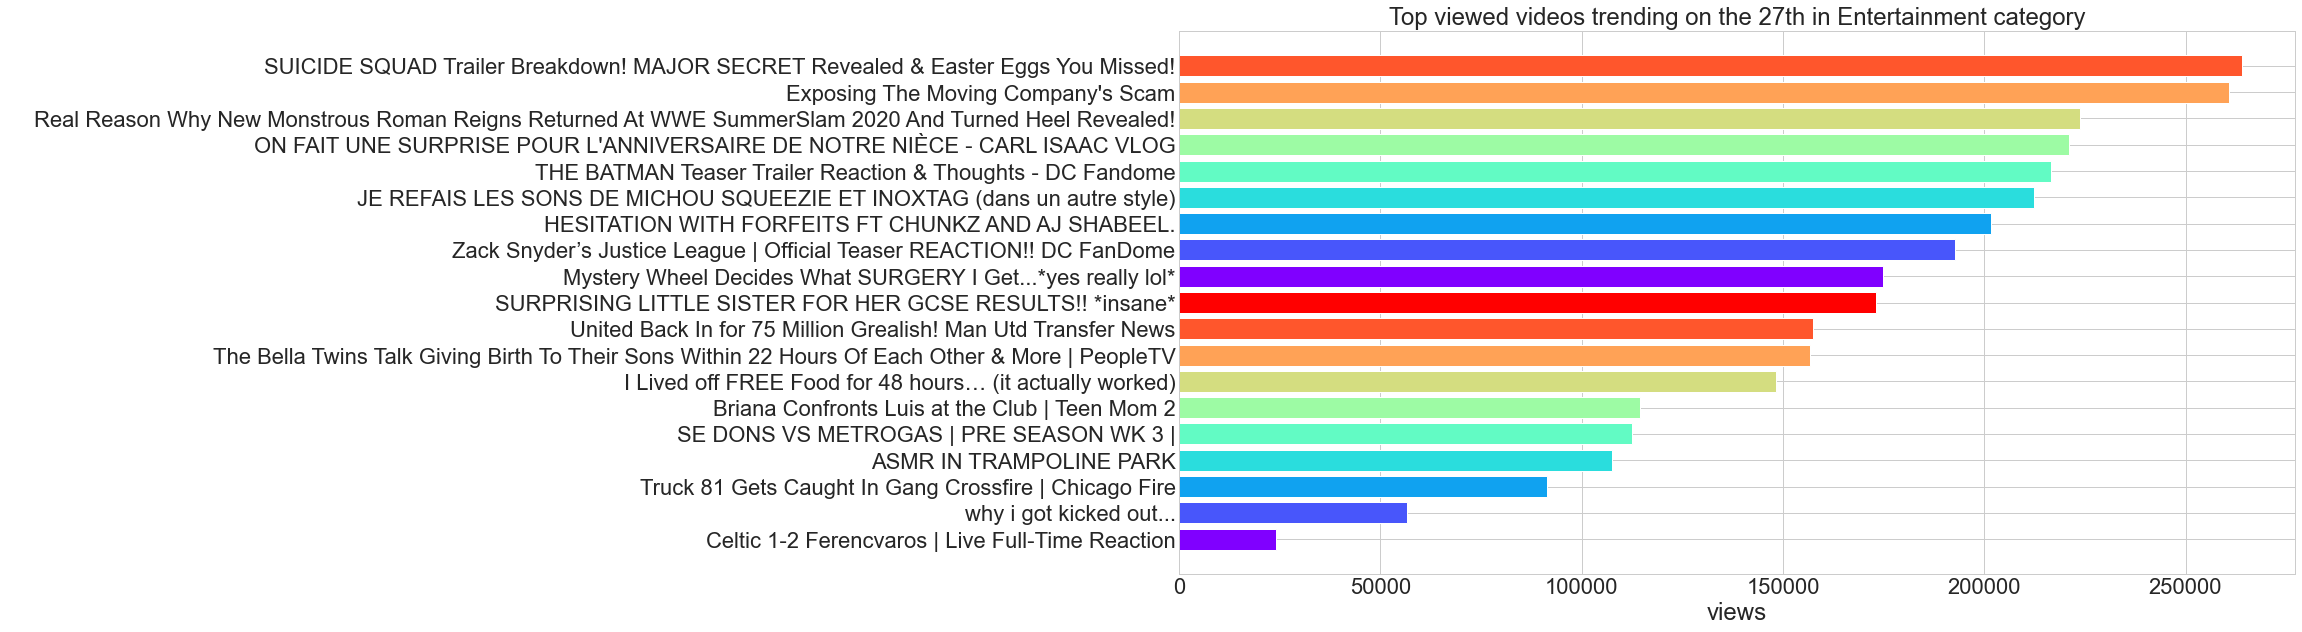

In [84]:
# take a look at which videos were viewed the most
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

plt.title('Top viewed videos trending on the 27th in Entertainment category')
plt.xlabel('views')
plt.ylabel(' ')

df_e27 = df_e27.sort_values(by=['view_count'],ascending=True)
df_e27.reset_index(drop=True, inplace=True)

df_e27_top = df_e27[1:20]
plt.barh(df_e27_top['title'], df_e27_top['view_count'], color=colors)



Why was the "A$AP Rocky Answers 18 Questions From Rihanna" video trending? Which key words were popular on google?

In [85]:
kw_list = ['as$p','Rocky','Rhianna']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-23T01 2020-08-30T05',geo='US',gprop='')
rhiaasap = pytrends.interest_over_time()
rhiaasap2 = rhiaasap
rhiaasap2 = rhiaasap2.reset_index()
rhiaasap2.columns = ['day','as$p','Rocky','Rhianna','ispartial']
rhiaasap2 = pd.melt(rhiaasap2, id_vars = ['day'], value_vars = ['as$p','Rocky','Rhianna'])
rhiaasap2.columns = ['day','term','count']

### Plot 25 Google interest over time for terms 'as\$p','Rocky', and 'Rhianna'

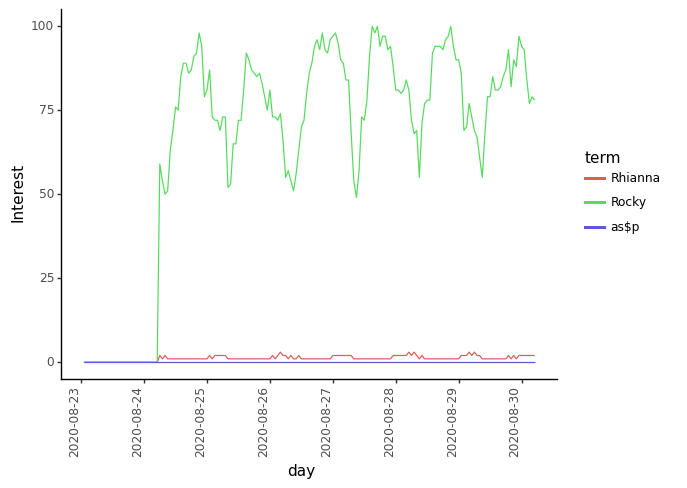

<ggplot: (7017641197)>

In [86]:
(ggplot(rhiaasap2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

It seems like "Rocky" is a popular search term.

### Plot 25 Most like videos in "Entertainment" category on 8/27/20

<BarContainer object of 24 artists>

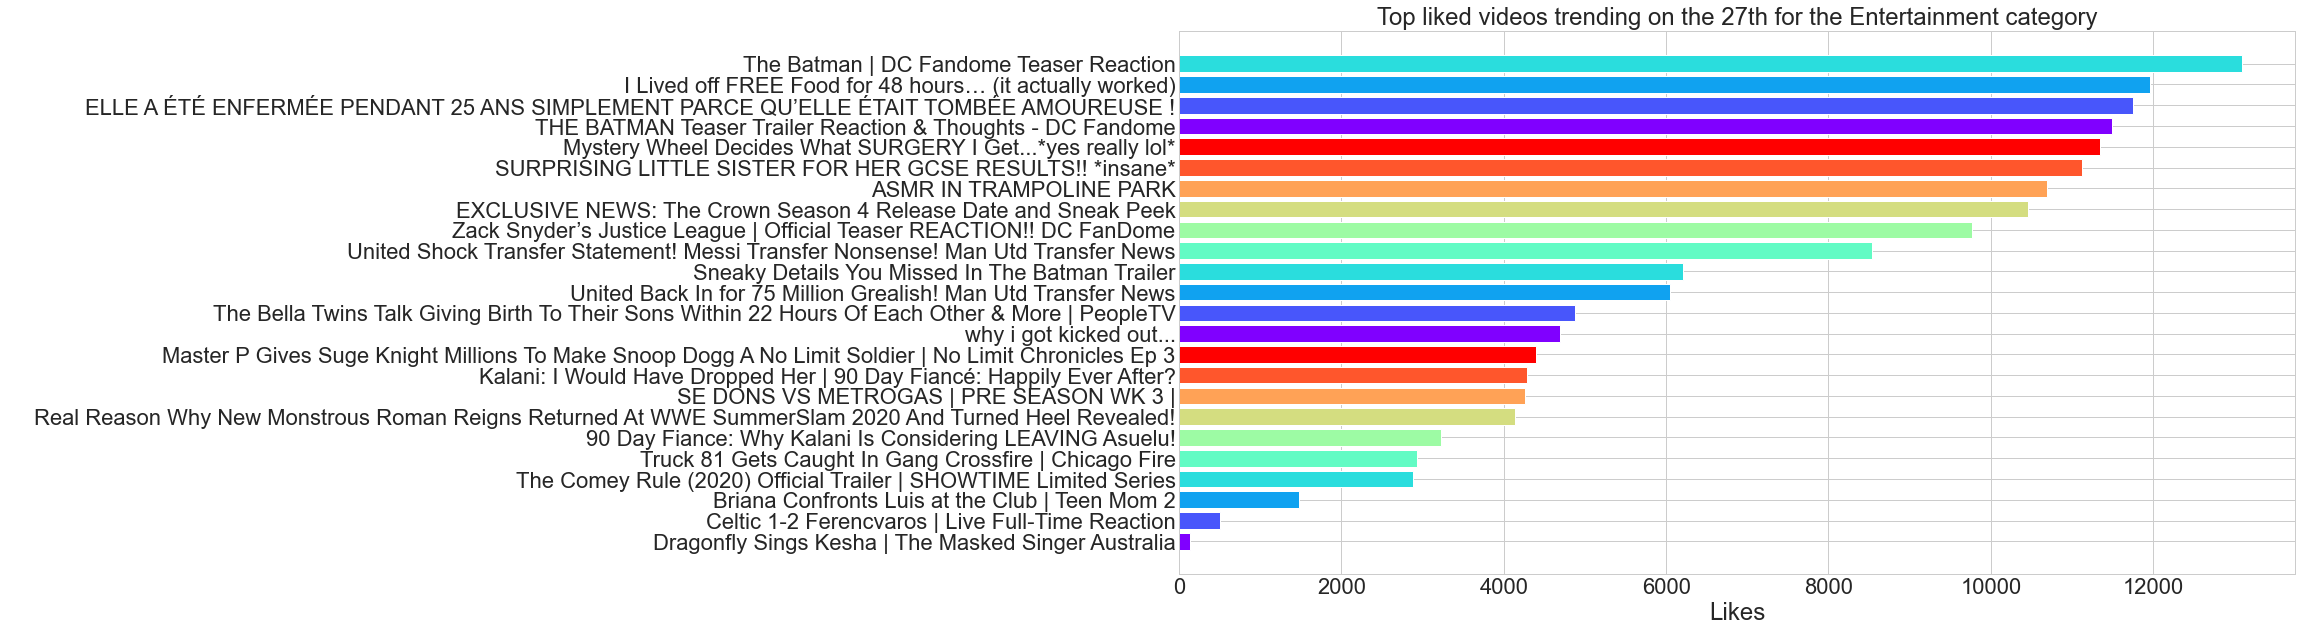

In [87]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top liked videos trending on the 27th for the Entertainment category')
plt.xlabel('Likes')
plt.ylabel(' ')

df_e27 = df_e27.sort_values(by=['likes'],ascending=True)
df_e27.reset_index(drop=True, inplace=True)

df_e27_top2 = df_e27[1:25]
plt.barh(df_e27_top2['title'], df_e27_top2['likes'], color=colors)


### Plot 26 Wordcloud for "Entertainment" category on 8/29/20

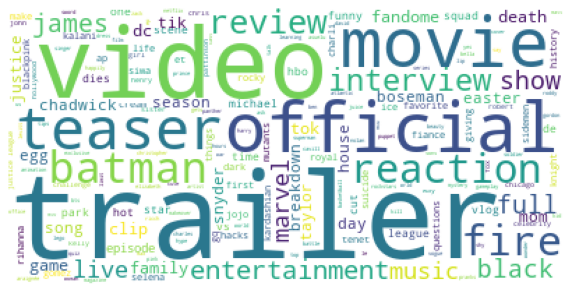

In [88]:
# Create a word cloud for "Entertainment" category from August 29th


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(df_e29))
tags = df_e29['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(df_e29['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



### Plot 27 Top words in the title and tags vs their count in Entertainment 08/29/20

<BarContainer object of 20 artists>

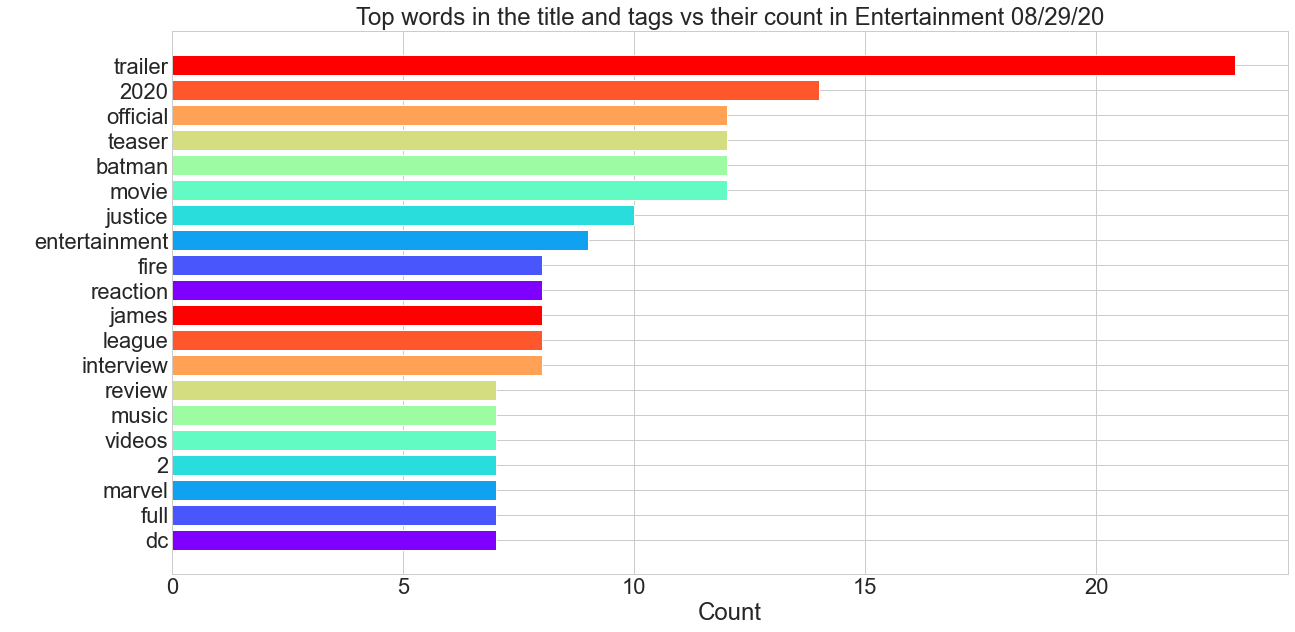

In [89]:
# Take a look at which words were popular in tags in video titles on the 29th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/29/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

Unlike the other two days, "boseman" was used over 10 times in titles and tags.

### Videos trending on the 29th with term "boseman" in title or tag

In [90]:
# Find which videos contain the word "boseman"
df_e29[df_e29['title'].str.contains("boseman", case=False)]['title']

0     'Black Panther' Star Chadwick Boseman Dies at ...
16    Chadwick Boseman's Marvel Family, Fellow Stars...
50                           R.I.P. Chadwick Boseman...
Name: title, dtype: object

As expected, it seems like it is due to videos being relased to the death of Chadwick Boseman on 08/28/20.

In [91]:
kw_list = ['Kevin Hart','Chadwick Boseman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-23T01 2020-08-30T05',geo='US',gprop='')
Boseman = pytrends.interest_over_time()
Boseman2 = Boseman
Boseman2 = Boseman2.reset_index()
Boseman2.columns = ['day','Kevin Hart','Chadwick Boseman','ispartial']
Boseman2 = pd.melt(Boseman2, id_vars = ['day'], value_vars = ['Kevin Hart','Chadwick Boseman'])
Boseman2.columns = ['day','term','count']

### Plot 28 Google interest over time for "Chadwick Boseman" vs "Kevin Hart"

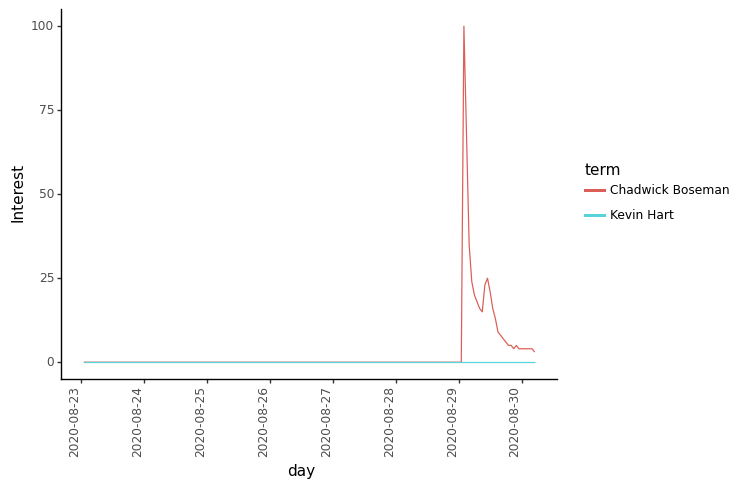

<ggplot: (7011791401)>

In [92]:
(ggplot(Boseman2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

### Plot 29 Number of likes for videos trending in the "Entertainment" category on 8/29/20 

<BarContainer object of 24 artists>

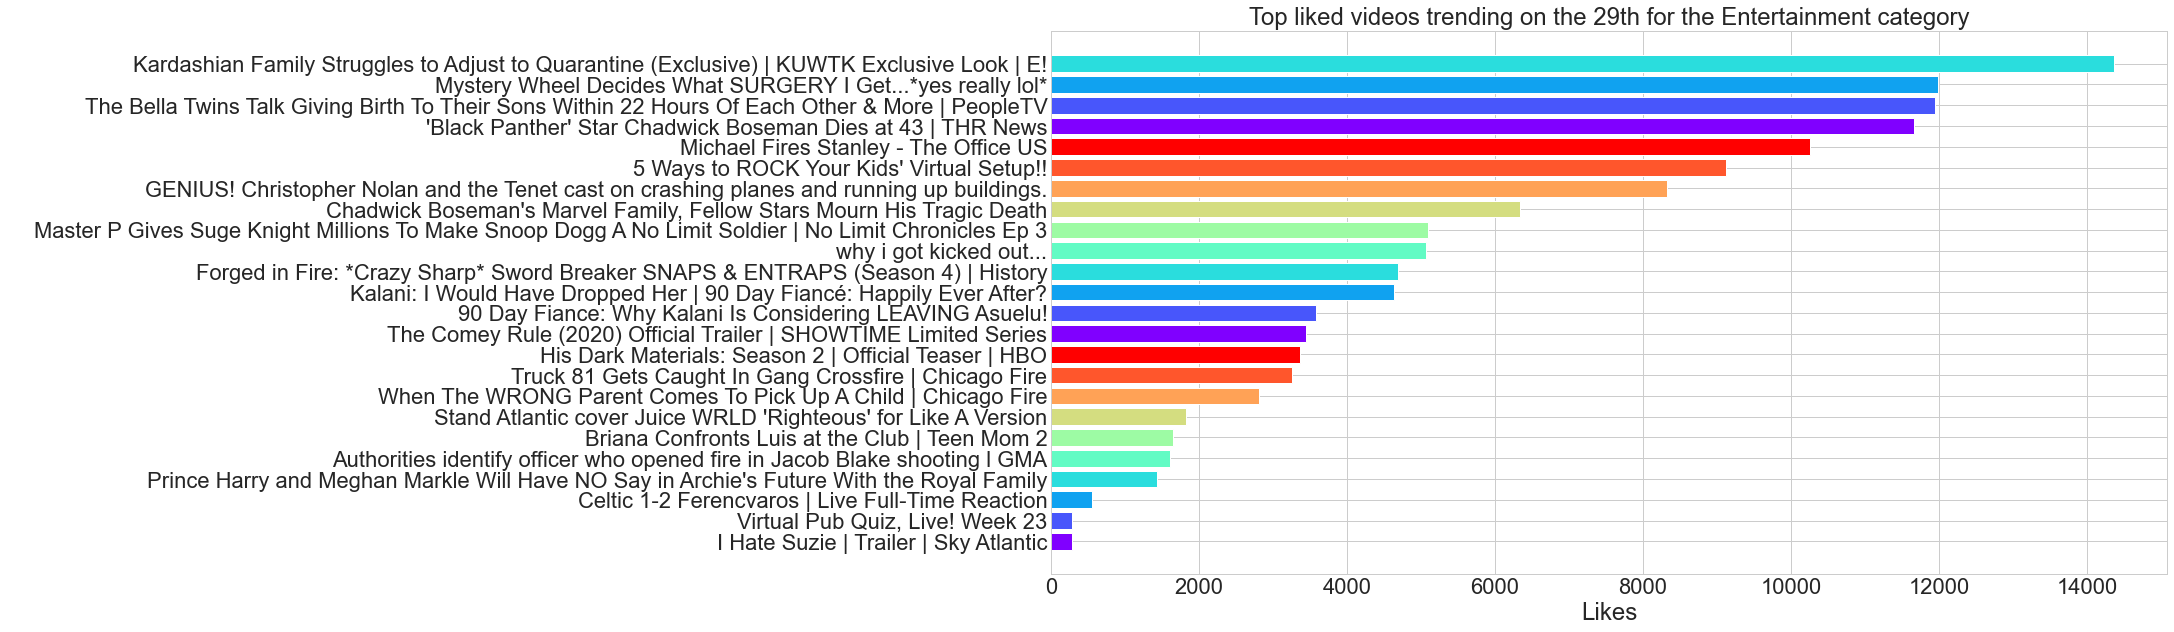

In [93]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top liked videos trending on the 29th for the Entertainment category')
plt.xlabel('Likes')
plt.ylabel(' ')

df_e29 = df_e29.sort_values(by=['likes'],ascending=True)
df_e29.reset_index(drop=True, inplace=True)

df_e29_top2 = df_e29[1:25]
plt.barh(df_e29_top2['title'], df_e29_top2['likes'], color=colors)

### Plot 30 Top viewed videos trending in the "Entertainment" category on 8/29/20 

<BarContainer object of 24 artists>

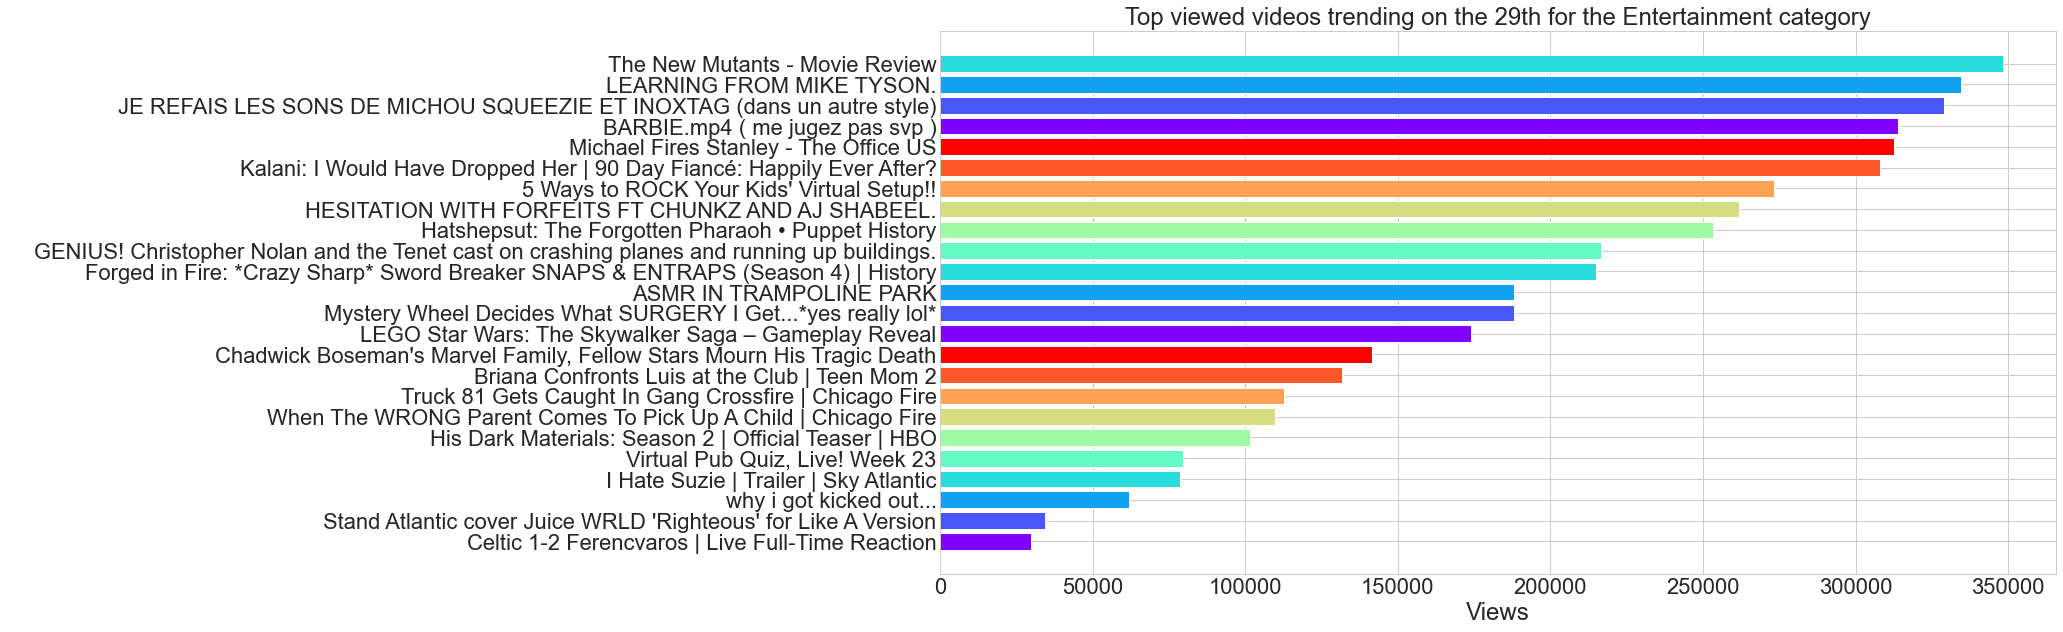

In [94]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top viewed videos trending on the 29th for the Entertainment category')
plt.xlabel('Views')
plt.ylabel(' ')

df_e29 = df_e29.sort_values(by=['view_count'],ascending=True)
df_e29.reset_index(drop=True, inplace=True)

df_e29_top2 = df_e29[1:25]
plt.barh(df_e29_top2['title'], df_e29_top2['view_count'], color=colors)

### Plot 31 Channels with multiple trending videos in the "Entertainment" category

<BarContainer object of 30 artists>

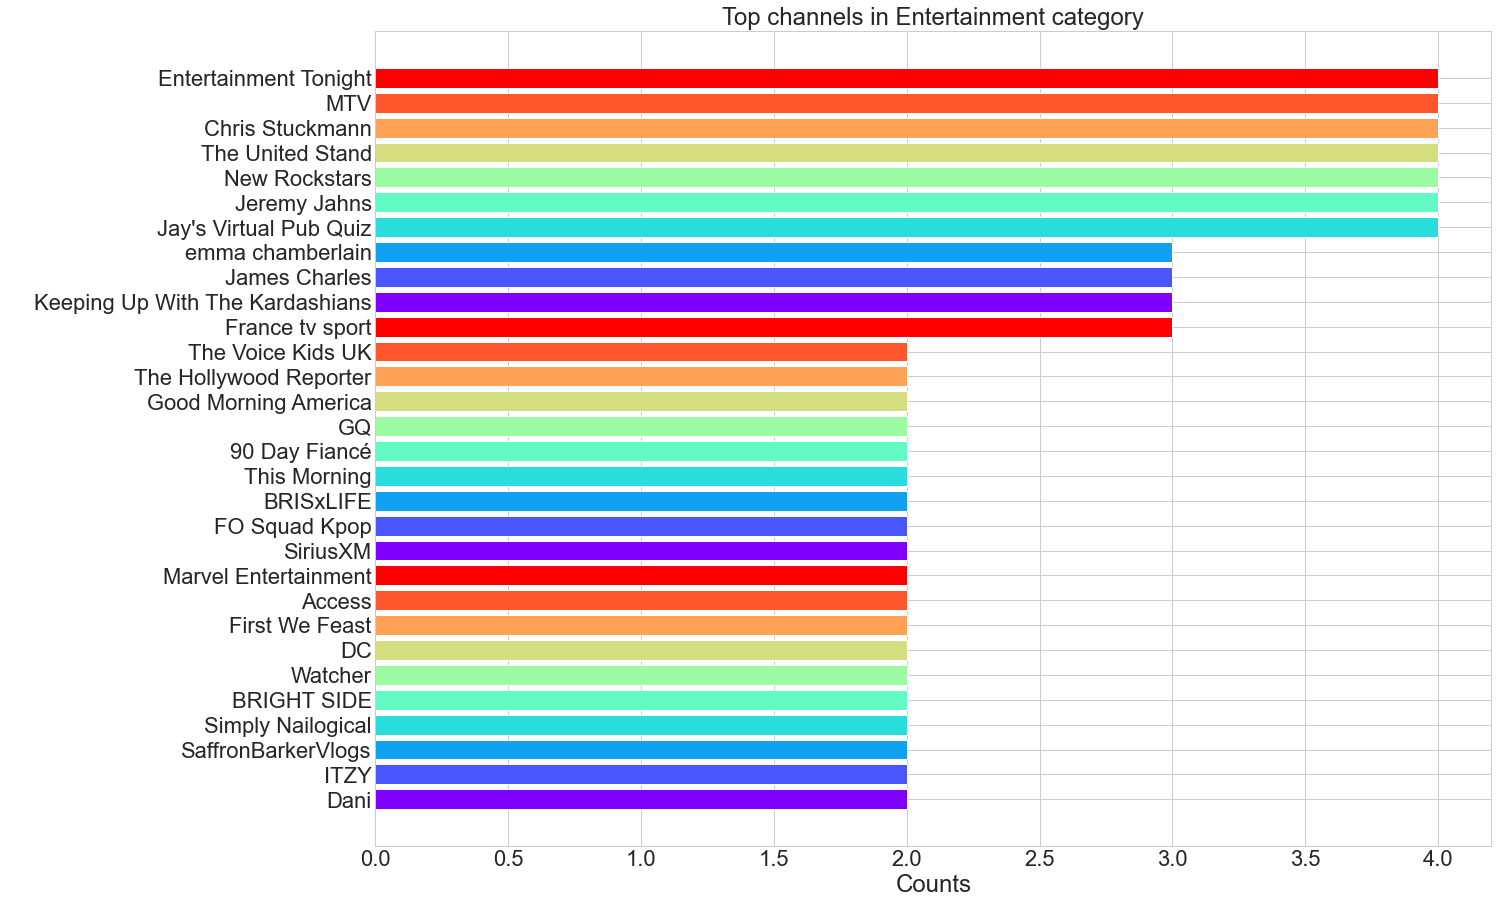

In [95]:
# Combine same videos (two videos are in the df twice for all three days)
group = df_e.groupby(['title','channelTitle','categories','categoryId','tags','publishedAt']).mean()
df_eall = group.reset_index()

all_channels = df_eall['channelTitle']

counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
    
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 15

plt.title('Top channels in Entertainment category')
plt.xlabel('Counts')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

Since top words on wordcloud plot was Batman, channels that create content related to the Batman movie is expected to be on this list.

Three out of 4 trending videos by "New Rockstars" channel is related to the Batman movie trailer.

### Videos trending from channel "New Rockstars"

In [96]:
df_eall[df_eall['channelTitle'].str.contains("New Rockstars")]['title']

97     Justice League Snyder Cut Trailer Breakdown! E...
154    SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...
169    THE BATMAN TRAILER REACTION! Robert Pattinson ...
171    THE BATMAN Trailer Breakdown! Riddler Clue SOL...
Name: title, dtype: object

### Batman related videos

"Batman was the top key word used in titles and tags for all three days analyzed. How many Batman movie related videos were trending?

### List of all Batman related videos  that were on the trending page

In [97]:
batman_title = english_vids[english_vids['title'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
batman_tags = english_vids[english_vids['tags'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_title = english_vids[english_vids['title'].str.contains("Gotham", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_tags = english_vids[english_vids['tags'].str.contains("gotham", case=False)][['title','channelTitle','publishedAt','view_count']]

batman = batman_title.append(batman_tags)
batman = batman.append(gotham_title)
batman = batman.append(gotham_tags)


batman = batman.groupby(['title','channelTitle','publishedAt']).mean()
batman = batman.sort_values(by = 'view_count',ascending=False)
batman.reset_index()

title           channelTitle  \
0                      The Batman - DC FanDome Teaser  Warner Bros. Pictures   
1           Wonder Woman 1984 - Official Main Trailer  Warner Bros. Pictures   
2   Zack Snyder’s Justice League | Official Teaser...                HBO Max   
3   THE SUICIDE SQUAD – DC FanDome Exclusive Sneak...  Warner Bros. Pictures   
4   Travis Scott - The Plan (From the Motion Pictu...        TravisScottVEVO   
5             Gotham Knights - World Premiere Trailer                     DC   
6   The Batman Trailer 2021 Breakdown and Easter E...      Emergency Awesome   
7         The Batman - Official Trailer (My Thoughts)           Jeremy Jahns   
8                                Tenet - Movie Review        Chris Stuckmann   
9   THE BATMAN Trailer Breakdown! Riddler Clue SOL...          New Rockstars   
10  The BATMAN Trailer Every EASTER EGG and Refere...            ScreenCrush   
11  THE BATMAN TRAILER REACTION! Robert Pattinson ...          New Rockstars   
12                        The Batman Trailer REACTION     Beyond The Trailer   
13  Justice League Snyder Cut Trailer Breakdown! E...          New Rockstars   
14            The Batman | DC Fandome Teaser Reaction              Hyper RPG   
15  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...          New Rockstars   
16    Sneaky Details You Missed In The Batman Trailer                 Looper   
17  The Batman - DC FanDome Official Teaser Reacti...                  RT TV   
18  THE BATMAN Teaser Trailer Reaction & Thoughts ...      Black Nerd Comedy   
19  Zack Snyder’s Justice League | Official Teaser...             Blind Wave   

             publishedAt    view_count  
0   2020-08-23T00:57:22Z  1.963180e+07  
1   2020-08-22T17:27:11Z  1.332686e+07  
2   2020-08-22T21:52:58Z  9.707570e+06  
3   2020-08-22T19:25:56Z  4.969617e+06  
4   2020-08-22T04:00:05Z  2.482372e+06  
5   2020-08-22T17:34:48Z  2.240442e+06  
6   2020-08-23T02:25:51Z  1.251786e+06  
7   2020-08-23T06:20:53Z  9.486062e+05  
8   2020-08-27T13:00:02Z  7.667253e+05  
9   2020-08-24T20:47:15Z  7.306661e+05  
10  2020-08-23T18:47:04Z  6.170347e+05  
11  2020-08-23T03:35:14Z  5.540280e+05  
12  2020-08-23T01:39:43Z  4.798435e+05  
13  2020-08-25T22:03:54Z  4.196525e+05  
14  2020-08-23T08:27:42Z  3.480212e+05  
15  2020-08-26T19:57:05Z  3.197420e+05  
16  2020-08-23T20:00:06Z  3.061860e+05  
17  2020-08-23T05:54:19Z  2.870000e+05  
18  2020-08-23T04:55:03Z  2.117385e+05  
19  2020-08-23T19:30:01Z  1.857200e+05

Interestinlgy, even though Suicide Squad movie trailer was also released on the same day as the Batman movie, only one video related to Suicide Squad is treading other than the official trailer. Also, vidoes about the SUICIDE SQUAD trailer (#11) got on the trending page even though it was published 5 days after the trailer was released.

### List of all Suicide Squad related videos that were on the trending page

In [98]:
squad_title = english_vids[english_vids['title'].str.contains("SUICIDE SQUAD", case=False)][['title','channelTitle','view_count']]
squad_tag = english_vids[english_vids['tags'].str.contains("SUICIDE SQUAD", case=False)][['title','channelTitle','view_count']]
squad = squad_title.append(squad_tag)
squad = squad.groupby(['title','channelTitle']).mean()
squad = squad.sort_values(by = 'view_count',ascending=False)
squad.reset_index()

title           channelTitle  \
0          Wonder Woman 1984 - Official Main Trailer  Warner Bros. Pictures   
1  THE SUICIDE SQUAD – DC FanDome Exclusive Sneak...  Warner Bros. Pictures   
2  Suicide Squad: Kill the Justice League Officia...                     DC   
3  Suicide Squad: Kill the Justice League - Offic...               GameSpot   
4  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...          New Rockstars   

     view_count  
0  1.332686e+07  
1  4.969617e+06  
2  4.744251e+06  
3  3.661205e+05  
4  3.197420e+05

In [99]:
kw_list = ['Suicide Squad','Batman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-09-01',geo='US',gprop='')
batmanvssquad = pytrends.interest_over_time()
batmanvssquad2 = batmanvssquad
batmanvssquad2 = batmanvssquad2.reset_index()
batmanvssquad2.columns = ['day','Suicide Squad','Batman','ispartial']
batmanvssquad2 = pd.melt(batmanvssquad2, id_vars = ['day'], value_vars = ['Suicide Squad','Batman'])
batmanvssquad2.columns = ['day','term','count']

### Plot 32 Google interest over time for terms 'Batman', and 'Suicide Squad'

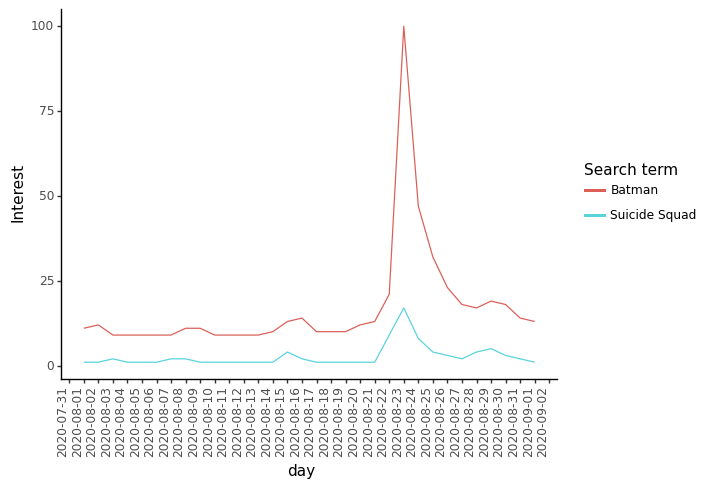

<ggplot: (7010942553)>

In [100]:
(ggplot(batmanvssquad2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

It is clear why videos from some channels such as DC and New Rockstars and Jeremy Jahns (both superhero comentary channels) are trending (because of interest in the new Batman movie).

The other channels with multiple trending videos related to influencers with large followings (Kardashians (popular celebrity), James Charles (21.2M subscribers as of 8/26/2020), and emma chamberlain (9.34 M). This makes sense since many subscribers get notified when the channels upload new videos. Therefore, view counts and engagement would grow rapidly. 


But why are (how does) small channels such as SafferonBarkerVlogs (1.1M ) also have more than one video trending?


In [164]:
kw_list = ['James Charles','Manchester United','The United Stand']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','Manchester United','The United Stand','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','Manchester United','The United Stand'])
youtubers2.columns = ['day','term','count']

### Plot 33 Google interest over time for channel names. 'Manchester United','James Charles','The United Stand'

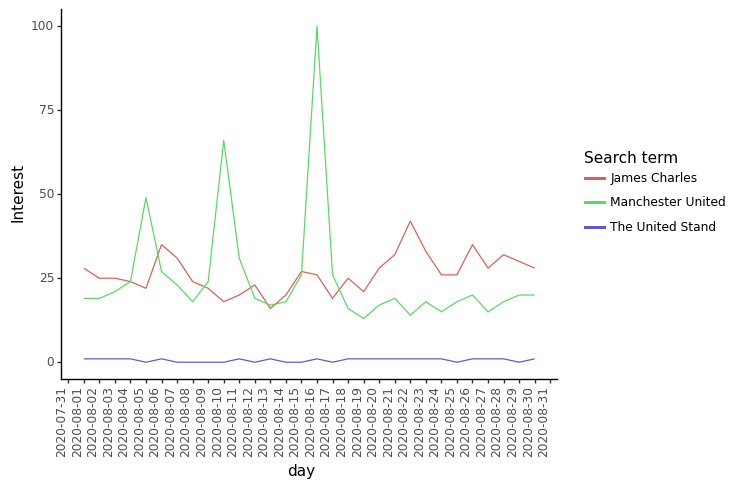

<ggplot: (7010949065)>

In [165]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [101]:
kw_list = ['James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand'])
youtubers2.columns = ['day','term','count']

### Plot 34 Google interest over time for channel names. 'James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand'


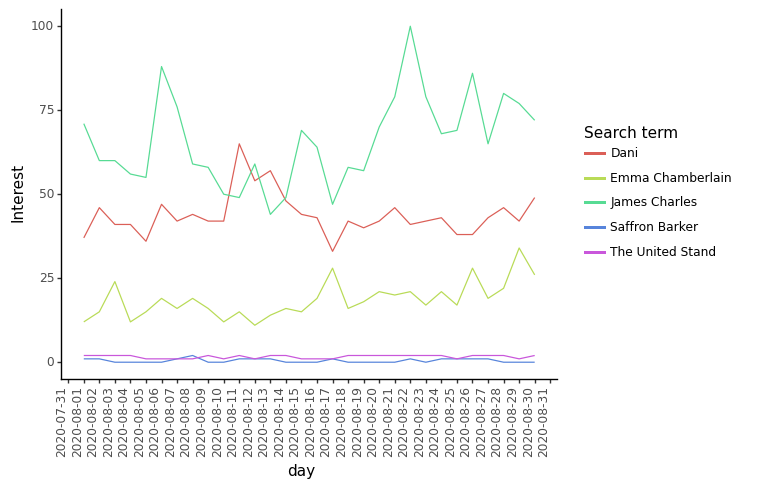

<ggplot: (7010946025)>

In [102]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

When we check the google interest over time for their names, youtubers with large followings have a interest score while the small youtubers don't.

### Comparing videos by a large vs. a small youtuber.

Comparing titles of videos by James Charles with the titles of vidoes by SaffronBarkerVlogs to see if there's hint in the titles and tags for their trending videos.

### Videos by 'James Charles'

In [103]:
df_eall[df_eall['channelTitle'].str.contains("James Charles")][['title','channelTitle','tags','publishedAt']]

title   channelTitle  \
60  Emma Chamberlain Picks My Outfits For A Week!  James Charles   
70              Giving JoJo Siwa A FULL MAKEOVER!  James Charles   
79      I Bought My First Home! 2020 House Tour 🏡  James Charles   

                                                 tags           publishedAt  
60  james|james charles|makeup artist|mua|covergir...  2020-09-01T19:00:08Z  
70  james|james charles|makeup artist|mua|covergir...  2020-08-21T19:00:06Z  
79  james|james charles|makeup artist|mua|covergir...  2020-08-25T19:00:10Z

In [166]:
df_eall[df_eall['channelTitle'].str.contains("emma chamberlain")][['title','channelTitle','tags','publishedAt']]

title      channelTitle  \
48   DOING JAMES CHARLES MAKEUP *WE'RE BACK?*  emma chamberlain   
80                               I CAN'T COOK  emma chamberlain   
202            WHAT MY LIFE IS REALLY LIKE...  emma chamberlain   

                                                  tags           publishedAt  
48   emma chamberlain|emma chambie|vlog|james charl...  2020-09-01T19:00:08Z  
80   emma chamberlain|emma chambie|vlog|cooking wit...  2020-08-23T17:48:07Z  
202      emma chamberlain|emma chambie|vlog|daily vlog  2020-08-16T19:00:20Z

### Videos by 'SaffronBarkerVlogs'

In [104]:
df_eall[df_eall['channelTitle'].str.contains("SaffronBarkerVlogs")][['title','channelTitle','tags','publishedAt']]

title        channelTitle  \
87                    I bought my dream house!! 😭😍  SaffronBarkerVlogs   
221  baby sitting + a road trip to my boyfriends!!  SaffronBarkerVlogs   

                                                  tags           publishedAt  
87   saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-26T18:00:00Z  
221  saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-23T19:45:58Z

A couple of observations: 
1. James Charles' videos have titles and tags that includes individuals' names that are famous such as 'JoJo Siwa' (11.8M subscribers), Emma Chamberlain (9.3M), and himself.
2. The both James Charles and SaffronBarkerVlogs have a trending new house videos and their titles are remarkably similar. 

I think there are two possiblities:
1. SaffronBarkerVlogs' videos trended because her title was similar to another trending video's title. or
2. The words that were used in the titles were high of interest.

In [105]:
kw_list = ['James Charles','baby sitting','boyfriends','dream house','road trip']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','baby sitting','boyfriends','dream house','road trip','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','baby sitting','boyfriends','dream house','road trip'])
youtubers2.columns = ['day','term','count']

### Plot 35 Google interest over time for terms used in titles. 'James Charles','baby sitting','boyfriends','dream house','road trip'

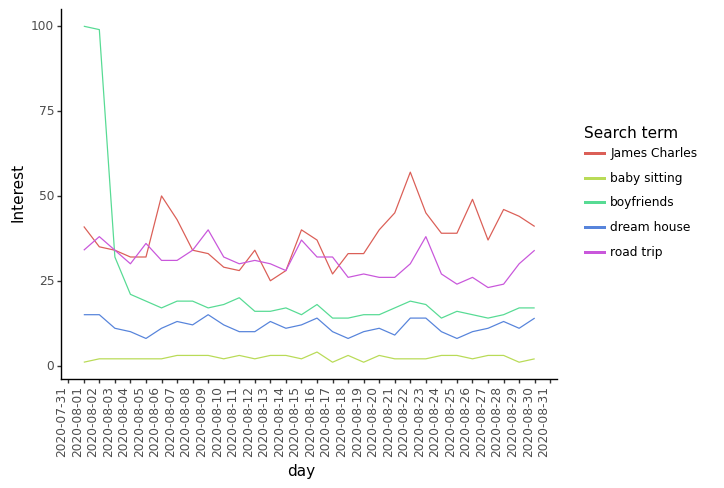

<ggplot: (7014109037)>

In [106]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

'Road trip' and 'dream house' are key words that are searched a lot.

In [107]:
english_vids[english_vids['title'].str.contains("road trip", case=False)][['title','channelTitle','tags','publishedAt']]

title  \
2123                       Road trip to see the girls!   
2124                       Road trip to see the girls!   
2125                       Road trip to see the girls!   
2126                       Road trip to see the girls!   
2359  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2360  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2361  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2868     baby sitting + a road trip to my boyfriends!!   

                                   channelTitle  \
2123                                 Lily Grace   
2124                                 Lily Grace   
2125                                 Lily Grace   
2126                                 Lily Grace   
2359  Trip In A Van - RoadTrip Australia Series   
2360  Trip In A Van - RoadTrip Australia Series   
2361  Trip In A Van - RoadTrip Australia Series   
2868                         SaffronBarkerVlogs   

                                                   tags           publishedAt  
2123  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2124  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2125  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2126  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2359                                             [none]  2020-08-30T05:00:06Z  
2360                                             [none]  2020-08-30T05:00:06Z  
2361                                             [none]  2020-08-30T05:00:06Z  
2868  saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-23T19:45:58Z

Get top trending terms on Google on 9/1/2020 and 9/2/2020

In [108]:
# key words trending on 9/1/2020 (ran on 9/1/2020)
#trending0901 = pytrends.trending_searches(pn='united_states')
#trending0901.columns = ['words']
#trending0901.head()

In [109]:
# key words trending on 9/2/2020 (ran on 9/2/2020)
#trending0902 = pytrends.trending_searches(pn='united_states')
#trending0902.columns = ['words']
#trending0902

In [110]:
filenames = [i for i in glob.glob('trending*.{}'.format('xls'))]
filenames

['trending0902.xls', 'trending0901.xls']

In [111]:
filenames[0][8:12]

'0902'

In [112]:
# Extract columnnames
df = pd.read_excel(filenames[0])
columnnames = df.columns
df_names = []
# Create empty dataframe
trends = pd.DataFrame(columns = columnnames)
for f in filenames:
    d = pd.read_excel(f) 
    d['file'] = f[0:12]
    d['trending_date'] = '2020' + f[8:12]
    trends = trends.append(d)
    df_names.append(f[0:12])

trends.reset_index(drop=True,inplace=True)

Videos trending with words

In [113]:
df_0901

title     channelTitle  \
1                       #TDF2020 - Stage 1 - Highlights   Tour de France   
4                       #TDF2020 - Stage 2 - Highlights   Tour de France   
9                   $100,000 Dream vs Technoblade Duel!   MrBeast Gaming   
16     $4 Breakfast Sandwich Vs. $30 Breakfast Sandwich    BuzzFeedVideo   
20                                 $4 Rice Vs. $52 Rice    BuzzFeedVideo   
...                                                 ...              ...   
2941  𝙲𝚊𝚕𝚕 𝚘𝚏 𝙳𝚞𝚝𝚢®: 𝙱𝚕𝚊𝚌𝚔 𝙾𝚙𝚜 𝙲𝚘𝚕𝚍 𝚆𝚊𝚛 - 𝚁𝚎𝚟𝚎𝚊𝚕 𝚃𝚛𝚊...     Call of Duty   
2947  𝙿𝚎𝚛𝚜𝚎𝚞𝚜 𝙱𝚛𝚒𝚎𝚏𝚒𝚗𝚐 𝙲𝚒𝚗𝚎𝚖𝚊𝚝𝚒𝚌 - 𝙾𝚏𝚏𝚒𝚌𝚒𝚊𝚕 𝙲𝚊𝚕𝚕 𝚘𝚏 ...     Call of Duty   
2957  🎥 PRE-SEASON LIVE | HUDDERSFIELD TOWN VS MANCH...            HTAFC   
2969  😱WE WERE NEARLY MAROONED!  — Our island advent...  All 4 Adventure   
2971  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   

            categories  categoryId trending_date  \
1               Sports          17      20.01.09   
4               Sports          17      20.01.09   
9               Gaming          20      20.01.09   
16      People & Blogs          22      20.01.09   
20      People & Blogs          22      20.01.09   
...                ...         ...           ...   
2941            Gaming          20      20.01.09   
2947            Gaming          20      20.01.09   
2957            Sports          17      20.01.09   
2969  Autos & Vehicles           2      20.01.09   
2971            Sports          17      20.01.09   

                                                   tags           publishedAt  \
1     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
4     VRE|0200|Nice Haut Pays Nice|RLE|ALAPHILIPPE J...  2020-08-30T18:32:09Z   
9                                                [none]  2020-08-29T18:00:12Z   
16    buzzfeed|buzzfeedvideo|buzzfeed video|Worth It...  2020-08-30T15:00:02Z   
20    buzzfeed|buzzfeedvideo|buzzfeed video|Worth It...  2020-08-23T15:00:11Z   
...                                                 ...                   ...   
2941  call of duty|cod|activision|black ops|cold war...  2020-08-26T17:54:33Z   
2947  call of duty|cod|activision|black ops|cold war...  2020-08-27T18:09:08Z   
2957                                             [none]  2020-08-29T15:59:25Z   
2969  All4Adventure|australia|4wd|4wd action|4x4|unl...  2020-08-27T05:00:12Z   
2971  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   

      view_count      likes  dislikes     logdis   loglikes  total rating  \
1       176520.0    2937.00      50.0   3.912023   7.985144       2987.00   
4       117732.0    2442.00      34.0   3.526361   7.800573       2476.00   
9      8341402.0  683430.50   30052.0  10.310684  13.434880     713482.50   
16     1475321.5   47212.00    1115.0   7.016610  10.762403      48327.00   
20     2328951.0   69746.00    1186.0   7.078342  11.152615      70932.00   
...          ...        ...       ...        ...        ...           ...   
2941   6839087.0  387608.25   11292.0   9.331850  12.867750     398900.25   
2947   1308949.0   94657.00    1628.0   7.395108  11.458015      96285.00   
2957    136938.0    1041.00      38.0   3.637586   6.947937       1079.00   
2969     56286.0     909.00      14.0   2.639057   6.812345        923.00   
2971   1770099.0   75233.00     927.0   6.831954  11.228345      76160.00   

       logviews  lograting  logview_count  likedratio  
1     12.081189   8.002025      12.081189    0.983228  
4     11.676166   7.814400      11.676166    0.986228  
9     15.936742  13.477913      15.936742    0.957880  
16    14.204386  10.785746      14.204386    0.976926  
20    14.660929  11.169477      14.660929    0.983278  
...         ...        ...            ...         ...  
2941  15.738165  12.896467      15.738165    0.971692  
2947  14.084735  11.475068      14.084735    0.983091  
2957  11.827284   6.983790      11.827284    0.964693  
2969  10.938201   6.827629      10.938201    0.984725 

In [114]:
english_vids[english_vids['title'].str.contains('Leonard Fournette', case=False)]

title         channelTitle  \
1958  Pat McAfee Reacts To Leonard Fournette To The ...  The Pat McAfee Show   

     categories  categoryId trending_date  \
1958     Sports          17      20.04.09   

                                                   tags           publishedAt  \
1958  pat mcafee|show|podcast|sports|nfl|football|co...  2020-09-03T17:00:06Z   

      view_count   likes  dislikes    logdis  loglikes  total rating  \
1958    355051.0  6518.0     121.0  4.795791  8.782323        6639.0   

       logviews  lograting  logview_count  likedratio  
1958  12.780017   8.800717      12.780017     0.98176

In [115]:
dfs = [df_0901,df_0902,df_0903,df_0904]
test_df = pd.DataFrame(columns = df_e901.columns)
rows = []
for df in dfs:
    title_df = df[df['title'].str.contains('Leonard Fournette', case=False)]
    test_df = test_df.append(title_df)
    num_vids = len(test_df)
    rows.append(num_vids)

rows

[0, 0, 0, 1]

In [156]:
words = trends['words']
dfs = [df_0901,df_0902,df_0903,df_0904]
num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    rows = []
    for df in dfs:
        title_df = df[df['title'].str.contains(str_tofind, case=False)]
        tag_df =df[df['tags'].str.contains(str_tofind, case=False)]
        temp_df = pd.concat([tag_df,title_df])
        # Combine videos with same title and channeltitle
        temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
        temp_df.reset_index()
        num_vids = len(temp_df)
        rows.append(num_vids)
    num_vidslist.append(rows)


In [157]:
num_vidslist = pd.DataFrame(num_vidslist)
trending = pd.concat([trends,num_vidslist],axis=1)
trending.columns = ['words','file','trendedongoogle','20200901','20200902','20200903','20200904']
trending['sum'] = trending.sum(axis=1)


In [158]:
# Count the number of videos for each key word
words = trends['words']

num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    title_df = english_vids[english_vids['title'].str.contains(str_tofind, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(str_tofind, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df.reset_index()

    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)
trending['total_videos'] = num_vidslist
trending = trending.sort_values(by=['total_videos'], ascending=False)
trending.reset_index(drop=True, inplace=True)
trending.head(10)

words          file trendedongoogle  20200901  20200902  \
0         Miley Cyrus  trending0901        20200901         5         8   
1             Celtics  trending0902        20200902         1         2   
2        David Blaine  trending0902        20200902         1         1   
3             Nuggets  trending0902        20200902         1         1   
4              Monica  trending0901        20200901         0         2   
5   Leonard Fournette  trending0901        20200901         0         0   
6        Keanu Reeves  trending0902        20200902         1         1   
7  Rockets vs Thunder  trending0902        20200902         0         0   
8           ASAP Ferg  trending0902        20200902         1         0   
9              Bruins  trending0901        20200901         0         0   

   20200903  20200904  sum  total_videos  
0         8         7   28             8  
1         2         4    9             6  
2         4         4   10             5  
3         1         0    3             2  
4         2         2    6             2  
5         0         1    1             1  
6         1         0    3             1  
7         1         1    2             1  
8         0         0    1             1  
9         0         0    0             0

In [ ]:
# Count the number of videos for each key word
words = trends['words']
trending = pd.DataFrame(words, columns = ['words'])


num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    title_df = english_vids[english_vids['title'].str.contains(str_tofind, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(str_tofind, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df.reset_index()

    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)
trending_v = pd.concat([trends,num_vidslist],axis=1)

trending_v.columns = ['word','file','trending_date','num_vids']
trending_v.sort_values(by=['num_vids'], ascending=False)

In [ ]:


batman_title = df_e901[df_e901['title'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
batman_tags = df_e901[df_e901['tags'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_title = df_e901[df_e901['title'].str.contains("Gotham", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_tags = df_e901[df_e901['tags'].str.contains("gotham", case=False)][['title','channelTitle','publishedAt','view_count']]

batman = batman_title.append(batman_tags)
batman = batman.append(gotham_title)
batman = batman.append(gotham_tags)


batman = batman.groupby(['title','channelTitle','publishedAt']).mean()
batman = batman.sort_values(by = 'view_count',ascending=False)
batman.reset_index()

In [ ]:
# Create a word cloud for "Entertainment" category from August 29th


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(df_e901))
tags = df_e901['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(df_e901['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
# Take a look at which words were popular in tags in video titles on the 29th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/29/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [ ]:

black_title = df_e901[df_e901['title'].str.contains("black", case=False)][['title','channelTitle','publishedAt','view_count']]
black_tags = df_e901[df_e901['tags'].str.contains("black", case=False)][['title','channelTitle','publishedAt','view_count']]
black_title = df_e901[df_e901['title'].str.contains("black", case=False)][['title','channelTitle','publishedAt','view_count']]
black_tags = df_e901[df_e901['tags'].str.contains("black", case=False)][['title','channelTitle','publishedAt','view_count']]

black = black_title.append(black_tags)
black = black.append(black_title)
black = black.append(black_tags)


black = black.groupby(['title','channelTitle','publishedAt']).mean()
black = black.sort_values(by = 'view_count',ascending=False)
black.reset_index()


In [ ]:


black_title = df_e901[df_e901['title'].str.contains(" de ", case=False)][['title','channelTitle','publishedAt','view_count']]
black_tags = df_e901[df_e901['tags'].str.contains(" de ", case=False)][['title','channelTitle','publishedAt','view_count']]

black = black_title.append(black_tags)



black = black.groupby(['title','channelTitle','publishedAt']).mean()
black = black.sort_values(by = 'view_count',ascending=False)
black.reset_index()

In [ ]:
boseman_title = df_e901[df_e901['title'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]
boseman_tags = df_e901[df_e901['tags'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]
boseman_title = df_e901[df_e901['title'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]
boseman_tags = df_e901[df_e901['tags'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]

boseman = boseman_title.append(boseman_tags)
boseman = boseman.append(boseman_title)
boseman = boseman.append(boseman_tags)


boseman = boseman.groupby(['title','channelTitle','publishedAt']).mean()
boseman = boseman.sort_values(by = 'view_count',ascending=False)
boseman.reset_index()

In [ ]:
taylor_title = df_e901[df_e901['title'].str.contains("taylor", case=False)][['title','channelTitle','publishedAt','view_count']]
taylor_tags = df_e901[df_e901['tags'].str.contains("taylor", case=False)][['title','channelTitle','publishedAt','view_count']]
taylor_title = df_e901[df_e901['title'].str.contains("taylor", case=False)][['title','channelTitle','publishedAt','view_count']]
taylor_tags = df_e901[df_e901['tags'].str.contains("taylor", case=False)][['title','channelTitle','publishedAt','view_count']]

taylor = taylor_title.append(taylor_tags)
taylor = taylor.append(taylor_title)
taylor = taylor.append(taylor_tags)


taylor = taylor.groupby(['title','channelTitle','publishedAt']).mean()
taylor = taylor.sort_values(by = 'view_count',ascending=False)
taylor.reset_index()


In [ ]:
df = df_e901[df_e901['title'].str.contains('black', case=False)]
newtrends = pd.DataFrame(columns = df.columns)
words = trending29['words']
for w in words:
    title_df = df_e901[df_e901['title'].str.contains(w, case=False)]
    tag_df = df_e901[df_e901['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    newtrends = pd.concat([newtrends,temp_df])
newtrends = newtrends.groupby(['title','channelTitle','publishedAt']).mean()
newtrends.reset_index()[['title','channelTitle','publishedAt']]

In [ ]:
words = allwords['words']
allwords.head()

In [ ]:
words = allwords['words'].to_list()
# Remove foreign characters 
s = ' '.join(words)
import string
printable = set(string.printable)
# filter foreign characters
string = ''.join(filter(lambda x: x in printable, s))
[i.replace('-','') for i in l] 
# Put it into a series
newwords = string.split()
# remove single character and two letter words
newwords = [i for i in newwords if len(i) > 2]

len(newwords)

In [ ]:
counted_words = pd.DataFrame.from_dict(counted_words.items())
counted_words.head()

In [ ]:
# Take a look at which words were popular in tags in video titles on the 26th
filtered_words = [word for word in newwords if word not in stopwords]
counted_words = collections.Counter(filtered_words)

counted_words = pd.DataFrame.from_dict(counted_words.items())
counted_words.columns = ['words','count']

In [ ]:
wordlist = counted_words['words']
wordlist

In [ ]:
# Takes forever to run this part

In [ ]:
newwords[500:510]

In [ ]:
interests

In [ ]:
interests = pd.DataFrame(interests)


In [ ]:
words = pd.DataFrame(newwords[0:40])

In [ ]:
wordinterest = pd.concat([words,interests], axis=1)
wordinterest.head()

In [ ]:
words = list(allwords.words)

In [ ]:
trending = pd.DataFrame(trending['words'])

In [ ]:
words = trending['words']
num_vidslist = []
for w in words:
    title_df = df_e901[df_e901['title'].str.contains(w, case=False)]
    tag_df = df_e901[df_e901['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)

trending_v = pd.concat([trending,num_vidslist],axis=1)
trending_v.columns = ['word','num_vids']

In [188]:
from youtube_search import YoutubeSearch

videos = YoutubeSearch('batman', max_results=10).to_json()
channels = YoutubeSearch('batman', max_results=10).to_json()

Used this to get youtube search results:
https://github.com/HermanFassett/youtube-scrape

In [200]:
jsonfilenames = [i for i in glob.glob('Ytsearch_*.{}'.format('json'))]

In [201]:
jsonfilenames

['Ytsearch_batman_1.json',
 'Ytsearch_batman_4.json',
 'Ytsearch_batman_3.json',
 'Ytsearch_batman_2.json']

In [ ]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
categoryIDs = pd.DataFrame(columns = ['id','snippet.title'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['items']) # Get a table from the last column
    df2 = df.loc[:,('id','snippet.title')] # Extract only id and category name
    country = f[11:13] # Get country code
    df2['Country'] = country # Add to a column
    categoryIDs = categoryIDs.append(df2)
categoryIDs.columns = ['id','Category','Country'] # Rename columns
categoryIDs.reset_index(drop=True, inplace=True)

In [197]:
from io import StringIO
df = pd.read_json('Ytsearch_batman_3.json')
pd.json_normalize(df['results'])

video.id                                        video.title  \
0   tGqXV2Bageo  Bruce Wayne do futuro fica jovem novamente | B...   
1   AvsEhpQd_rw  BATMAN #98- Why Can't ALL Comic Books Be This ...   
2   Viyzlt1rqSU  THE BATMAN New Trailer #2 (2021) | Matt Reeves...   
3   yj4Qw6PMlvk  Batman: Arkham Asylum - Full Game Walkthrough ...   
4   BRJZ2LwcpPE  The Batman Production Stooped over Robert Patt...   
5   mppGCssLQco              Minha Voz no Trailer do "The Batman"!   
6   H0VMtMYRTjo  LEGO SDCC Exclusive Batman Comic - What Is Thi...   
7   UB4zTGo2fhQ                        The Batman Trailer Reaction   
8   8qfpnFZQWmo  Batman The Brave And The Bold | Everyone Is Lo...   
9   ZQN0WMDONow  The Batman Selina Kyle Catwoman Friend or Foe?...   
10  Fbg9RFIwWLI                         Spider Hulk VS Iron Batman   
11  0coLXVN5eT4  THE BATMAN (2021) Teaser Trailer | New Matt Re...   
12  hGTcemRmfCA  The Batman Trailer - Alternate Batman Suit and...   
13  dW30x5n12Dc  No One Believes Batman is ACTUALLY Dead in Got...   
14  Se98aIIGMag  Everything Wrong With Batman vs Teenage Mutant...   
15  XWMAQOvIa58  Actor de Batman Robert Pattinson da Positivo a...   
16  WSAFNBUTq1g       The Batman - DC FanDome Teaser Reaction!!!!!   
17  CpPkSG7y-BQ  The Batman Will Show A More Emotional Bruce Wayne   
18  be1fjqZH44c  Pattinson da positivo: The Batman se detiene I...   
19  DWL8oUR2Vig                  BATMAN VS SPIDERMAN - EPIC BATTLE   

                                      video.url video.duration  \
0   https://www.youtube.com/watch?v=tGqXV2Bageo           4:54   
1   https://www.youtube.com/watch?v=AvsEhpQd_rw           6:54   
2   https://www.youtube.com/watch?v=Viyzlt1rqSU           2:26   
3   https://www.youtube.com/watch?v=yj4Qw6PMlvk        6:07:53   
4   https://www.youtube.com/watch?v=BRJZ2LwcpPE           2:40   
5   https://www.youtube.com/watch?v=mppGCssLQco           8:02   
6   https://www.youtube.com/watch?v=H0VMtMYRTjo           4:32   
7   https://www.youtube.com/watch?v=UB4zTGo2fhQ           4:55   
8   https://www.youtube.com/watch?v=8qfpnFZQWmo           3:20   
9   https://www.youtube.com/watch?v=ZQN0WMDONow          43:08   
10  https://www.youtube.com/watch?v=Fbg9RFIwWLI           1:24   
11  https://www.youtube.com/watch?v=0coLXVN5eT4           2:15   
12  https://www.youtube.com/watch?v=hGTcemRmfCA           9:55   
13  https://www.youtube.com/watch?v=dW30x5n12Dc          12:35   
14  https://www.youtube.com/watch?v=Se98aIIGMag          17:32   
15  https://www.youtube.com/watch?v=XWMAQOvIa58           2:26   
16  https://www.youtube.com/watch?v=WSAFNBUTq1g          13:00   
17  https://www.youtube.com/watch?v=CpPkSG7y-BQ           5:15   
18  https://www.youtube.com/watch?v=be1fjqZH44c           8:34   
19  https://www.youtube.com/watch?v=DWL8oUR2Vig           4:13   

                                        video.snippet video.upload_date  \
0                   <b>Batman</b> do Futuro Ep: 3x05.       3 hours ago   
1      IRON SIGHTS: 2 PSYCHOS Indiegogo Campaign: ...      19 hours ago   
2   THE <b>BATMAN</b> - Trailer 2 (2021 Movie) #Th...         1 day ago   
3   <b>Batman</b>: Return to Arkham - Arkham Asylu...        1 year ago   
4   The CBC is an online news outlet & community. ...        2 days ago   
5   Fiquei MUITO SURPRESO com a repercussão do tra...         1 day ago   
6   Today, we're looking at the Exclusive SDCC LEG...         1 day ago   
7   thebatman #movietrailer #reaction Hey Guys, DO...      21 hours ago   
8   When did <b>Batman</b> stop fighting crime? Al...       1 month ago   
9   The <b>Batman</b> trailer revealed Zoe Kravitz...        2 days ago   
10                                            well...       2 weeks ago   
11  THE <b>BATMAN</b> - Teaser Trailer (2021 Movie...      2 months ago   
12  The <b>Batman</b> Trailer 2021. Alternate <b>B...         1 day ago   
13  Why does absolutely no one believe WB Montreal...        2 days ago   
14  <b>Batman</b> vs TMN

In [171]:
english_vids[english_vids['title'].str.contains('Leonard Fournette', case=False)]

title         channelTitle  \
1958  Pat McAfee Reacts To Leonard Fournette To The ...  The Pat McAfee Show   

     categories  categoryId trending_date  \
1958     Sports          17      20.04.09   

                                                   tags           publishedAt  \
1958  pat mcafee|show|podcast|sports|nfl|football|co...  2020-09-03T17:00:06Z   

      view_count   likes  dislikes    logdis  loglikes  total rating  \
1958    355051.0  6518.0     121.0  4.795791  8.782323        6639.0   

       logviews  lograting  logview_count  likedratio  
1958  12.780017   8.800717      12.780017     0.98176

In [ ]:
words = allwords['words'].to_list()
s = ' '.join(words)
import string
printable = set(string.printable)
string = ''.join(filter(lambda x: x in printable, s))
newwords = string.split()
newwords = [i for i in newwords if len(i) > 2]

In [ ]:

newwords

In [ ]:
words = allwords['words'].to_list()
# Remove foreign characters 
s = ' '.join(words)
import string
printable = set(string.printable)
# filter foreign characters
string = ''.join(filter(lambda x: x in printable, s))

# Put it into a series
newwords = string.split()
# remove single character and two letter words
newwords = [i for i in newwords if len(i) > 2]

In [ ]:
# Look for all videos with 'trailer' in tags and title
strto_search = 'trailer'

titles = english_vids[english_vids['title'].str.contains(strto_search, case=False)][['title','channelTitle','tags','publishedAt','view_count']]
tags = english_vids[english_vids['tags'].str.contains(strto_search, case=False)][['title','channelTitle','tags','publishedAt','view_count']]


titles = titles.append(tags)

titles = titles.groupby(['title','channelTitle','tags','publishedAt']).mean()
titles = titles.sort_values(by = 'view_count',ascending=False)
videos_t = titles.reset_index()

In [ ]:
# Create a string for all words in title and tags in videos_t 
# (all videos with word trailer in tags and titles)


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(videos_t))
tags = videos_t['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(videos_t['title'].str.lower())
all_str = all_titles + ' ' + all_tags
all_wrds_trailer = all_str

In [ ]:
all_wrds_trailer = all_wrds_trailer.replace('(','')
all_wrds_trailer = all_wrds_trailer.replace(')','')
all_wrds_trailer = all_wrds_trailer.replace('+','')
all_wrds_trailer = all_wrds_trailer.replace('&','')
all_wrds_trailer = all_wrds_trailer.replace(':','')

In [ ]:
# clean up the string
# Remove foreign characters 
s = all_wrds_trailer
import string
printable = set(string.printable)
# filter foreign characters
string = ''.join(filter(lambda x: x in printable, s))

# Put it into a series
newwords = [word for word in string.split() if word not in stopwords]

# remove single character and two letter words
newwords = [i for i in newwords if len(i) > 2]

In [ ]:
counted_words = collections.Counter(newwords)
c_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
c_words['count'] = c_words['count'].astype(float)
toptrailer_words = c_words.sort_values(by=['count'],ascending=False)[(c_words['count']>5)].reset_index()
toptrailer_words.head()

In [ ]:
pytrends = TrendReq(hl='US',tz=360)
words = toptrailer_words['words']
wordinterest = pd.DataFrame(columns = ['words','interest'])
interests = []
for w in words:
    kw_list = [w]
    pytrends.build_payload(kw_list,timeframe='2020-08-24T12 2020-08-31T12',geo='US',gprop='')
    df_interest = pytrends.interest_over_time()
    df_interest2 = df_interest.reset_index()
    df_interest2.columns = ['day','count','ispartial']
    # Add up all the interest numbers and store it as 'interest'
    interest = sum(df_interest2['count'])
    interests.append(interest)
interests = pd.DataFrame(interests)

In [ ]:
# Count the number of videos for each key word
words = toptrailer_words['words']
trending = pd.DataFrame(words, columns = ['words'])
words = trending['words']
num_vidslist = []
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle']).mean()
    temp_df = temp_df.reset_index()
    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)
trending_v = pd.concat([trending,num_vidslist],axis=1)
trending_v.columns = ['word','num_vids']


In [ ]:
trending_trailer = pd.concat([trending_v,interests],axis=1)

In [ ]:
trending_trailer.columns = ['word','numvids','interest']

In [ ]:
trending_trailer = trending_trailer.sort_values(by =['numvids'], ascending=False)
trending_trailer.reset_index(drop=True, inplace=True)

In [ ]:
trending_trailer

In [ ]:
(ggplot(trending_trailer[2:len(trending_trailer)])
 + geom_point(aes(x='interest',y='numvids'))
 + theme_classic()
)


 

In [ ]:
# Convert trending date to date time format
english_vids['trending_date'] = pd.to_datetime(english_vids['trending_date'],format='%y.%d.%m')

In [ ]:
# Count the number of videos for each key word for each published day
words = ['boseman','james charles','batman']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','publishedAt'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','publishedAt']]
    temp_df['words'] = w                     
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['publishedAt'] = pd.to_datetime(trailer_vidslist['publishedAt'])
trailer_vidslist['pub_date'] = trailer_vidslist['publishedAt'].dt.date

keyeword_vidcount = trailer_vidslist.groupby(['words','pub_date'])['pub_date'].count()

keyeword_vidcount = pd.DataFrame(keyeword_vidcount)
keyeword_vidcount.columns = ['counts']
keyeword_vidcount = keyeword_vidcount.reset_index()

In [ ]:
keyeword_vidcount

In [ ]:
# Create list of dates to fill data set (0 for no videos)

from datetime import date
dates = pd.date_range('2020-08-15','2020-09-03' ).tolist()
dates_p = []
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_p.append(date)

In [ ]:

# Convert dates to string
dates_st = []
dates = keyeword_vidcount['pub_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyeword_vidcount['datest'] = dates_st
keyeword_vidcount_st = keyeword_vidcount.drop(columns = ['pub_date'])


In [ ]:
# Compare dates of the count list and add missing dates with 0 video counts
df =[]
df_toadd= pd.DataFrame(df,columns=['datest','words','counts'])
words = ['boseman','james charles','batman']
for w in words:
    dates_c = keyeword_vidcount_st[(keyeword_vidcount_st['words']==w)]['datest']
    toadddates = set(dates_p).difference(dates_c)
    toadddates = pd.DataFrame(toadddates,columns=['datest'])
    toadddates['words'] = w
    toadddates['counts'] = '0'
    df_toadd = df_toadd.append(toadddates)
    
trailer_df = pd.concat([keyeword_vidcount_st,df_toadd])

In [ ]:
trailer_df['datest'] = pd.to_datetime(trailer_df['datest'])
trailer_df['datest'] = trailer_df['datest'].dt.date

In [ ]:
trailer_df['counts'] = trailer_df['counts'].astype(float)

In [ ]:
trailer_df.head()

In [ ]:
# Count the number of videos for each key word for each trending day
words = ['boseman','james charles','batman']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','trending_date'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','trending_date']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','trending_date']]
    temp_df['words'] = w                     
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['trending_date'] = pd.to_datetime(trailer_vidslist['trending_date'])
trailer_vidslist['trending_date'] = trailer_vidslist['trending_date'].dt.date
    
# count the number of videos
keyword_trendingvids = trailer_vidslist.groupby(['words','trending_date'])['trending_date'].count()

keyword_trendingvids = pd.DataFrame(keyword_trendingvids)
keyword_trendingvids.columns = ['trending_counts']
keyword_trendingvids = keyword_trendingvids.reset_index()

In [ ]:
# Convert dates to string
dates_st = []
dates = keyword_trendingvids['trending_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyword_trendingvids['datest'] = dates_st
keyword_trendingvids_st = keyword_trendingvids.drop(columns = ['trending_date'])

In [ ]:
# Create list of dates to fill data set (0 for no videos)

# Compare dates of the count list and add missing dates with 0 video counts
df =[]
df_toadd= pd.DataFrame(df,columns=['datest','words','trending_counts'])
words = ['boseman','james charles','batman']
for w in words:
    dates_c = keyword_trendingvids_st[(keyword_trendingvids_st['words']==w)]['datest']
    toadddates = set(dates_p).difference(dates_c)
    toadddates = pd.DataFrame(toadddates,columns=['datest'])
    toadddates['words'] = w 
    toadddates['trending_counts'] = '0'
    df_toadd = df_toadd.append(toadddates)
    
trailertrending_df = pd.concat([keyword_trendingvids_st,df_toadd])

df =[]
df_toadd= pd.DataFrame(df,columns=['datest','words','trending_counts'])
words = ['boseman','james charles','batman']
for w in words:
    trailertrending_df.loc[trailertrending_df.words == w,'words']= w + ' trendingdate'


In [ ]:
trailertrending_df['trending_counts'] = trailertrending_df['trending_counts'].astype(float)

In [ ]:
trailertrending_df.columns = ['words', 'counts', 'datest']

In [ ]:
trailertrending_df.head()

In [ ]:
combined = pd.concat([trailer_df,trailertrending_df])

In [ ]:
combined

In [ ]:
(ggplot(trailer_df, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='words'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('# of treinding videos')
 + xlab('Published date')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [ ]:
trailer_df2 = trailer_df.copy()

In [ ]:
batman_interest = batmanvssquad2[43:len(batmanvssquad2)].copy()
batman_interest['term']= 'Batman interest'
batman_interest = batman_interest.reset_index(drop=True)
batman_interest.columns = ['datest','words','counts']

trailer_df2['counts'] = trailer_df2['counts']*10
compare = pd.concat([trailer_df2,batman_interest])

boseman_interest = Boseman2[(Boseman2['term']=='Chadwick Boseman')].copy()

boseman_interest['term'] = 'Boseman interest'
boseman_interest = boseman_interest.reset_index(drop=True)
boseman_interest.columns = ['datest','words','counts']
compare = pd.concat([compare,boseman_interest])



In [ ]:
compare

In [ ]:
compare['datest'] = pd.to_datetime(compare['datest'])

In [ ]:
(ggplot(compare, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='words'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [ ]:
trailer_df['counts'] = trailer_df['counts'].astype(float)

In [ ]:
combined['datest'] = pd.to_datetime(combined['datest'])


In [ ]:
combined.head()

In [ ]:
(ggplot(combined, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='words'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [ ]:
word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(english_vids))
tags = english_vids['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(english_vids['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
Miley_title = df_e901[df_e901['title'].str.contains("Miley", case=False)][['title','channelTitle','publishedAt','view_count']]
Miley_tags = df_e901[df_e901['tags'].str.contains("Miley", case=False)][['title','channelTitle','publishedAt','view_count']]


Miley = Miley_title.append(Miley_tags)



Miley = Miley.groupby(['title','channelTitle','publishedAt']).mean()
Miley = Miley.sort_values(by = 'view_count',ascending=False)
Miley.reset_index()

In [ ]:
english_vids.to_excel('videos.xls',index=False)

In [ ]:
str_tofind = 'clmence' 

ant_title = english_vids[english_vids['title'].str.contains('a$ap', case=False)][['title','channelTitle','publishedAt','view_count']]
ant_tags = english_vids[english_vids['tags'].str.contains('a$ap', case=False)][['title','channelTitle','publishedAt','view_count']]


ant = ant_title.append(ant_tags)



ant = ant.groupby(['title','channelTitle','publishedAt']).mean()
ant = ant.sort_values(by = 'view_count',ascending=False)
ant.reset_index()

In [ ]:
english_vids[english_vids['title'].str.contains('a$ap', case=False)]

In [ ]:
rh = df_e[df_e['title'].str.contains("interview", case=False)]
rh['title']

In [ ]:
df_e29[df_e29['title'].str.contains('boseman', case=False)]

In [ ]:
# Find which videos contain the word "Rhianna"
rh = df_e27[df_e27['title'].str.contains("Rihanna", case=False)]
rh['title']

In [159]:
# Find which videos contain the word "Rhianna"
df_0904[df_0904['title'].str.contains("boseman", case=False)]


title  \
27    'Black Panther' Star Chadwick Boseman Dies Of ...   
32    'Black Panther' Star Chadwick Boseman Dies at ...   
549   Chadwick Boseman Married His Longtime Love Bef...   
553                            Chadwick Boseman Tribute   
561                                  Chadwick Boseman..   
1311  Joe Rogan Gets Emotional Remembering Chadwick ...   
1581  MTV VMAs 2020: Lady Gaga and BTS Win Big, Show...   
1658  Michael B. Jordan Is 'Struggling' After Chadwi...   
2049                         R.I.P. Chadwick Boseman...   
2931  ‘Black Panther’ Star Chadwick Boseman Dies at ...   

                channelTitle       categories  categoryId trending_date  \
27           CBS Los Angeles  News & Politics          25      20.04.09   
32    The Hollywood Reporter    Entertainment          24      20.04.09   
549                  E! News    Entertainment          24      20.04.09   
553     Marvel Entertainment    Entertainment          24      20.04.09   
561            Tyrone Magnus           Comedy          23      20.04.09   
1311                SiriusXM    Entertainment          24      20.04.09   
1581               Billboard            Music          10      20.04.09   
1658   Entertainment Tonight    Entertainment          24      20.04.09   
2049        The Reel Rejects    Entertainment          24      20.04.09   
2931                   TODAY  News & Politics          25      20.04.09   

                                                   tags           publishedAt  \
27    KCAL 9 News Evening|Chadwick Boseman|Black Pan...  2020-08-29T03:10:23Z   
32    thr|the hollywood reporter|hollywood reporter|...  2020-08-29T06:11:20Z   
549   Top Stories|Entertainment|News|Chadwick Bosema...  2020-08-30T00:42:15Z   
553   marvel|comics|Black panther|Chadwick Boseman|t...  2020-08-31T03:16:02Z   
561   tyrone magnus|reaction|chadwick boseman|marvel...  2020-08-29T03:31:34Z   
1311  SiriusXM|Sirius XM|Sirius|SXM|joe rogan|joe ro...  2020-08-31T21:52:23Z   
1581  vmas|mtv|video music awards|billboard|billboar...  2020-08-31T06:23:12Z   
1658  Michael B Jordan|Chadwick Boseman|Black Panthe...  2020-08-31T18:12:31Z   
2049  the reel rejects|reaction|Chadwick Boseman|Cha...  2020-08-29T02:42:21Z   
2931  Weekend TODAY|News|Pop Culture|Editor's picks|...  2020-08-29T12:58:13Z   

      view_count       likes  dislikes    logdis   loglikes  total rating  \
27     1879898.0    53413.00   1181.00  7.074117  10.885809      54594.00   
32      988378.0    20893.00    581.00  6.364751   9.947169      21474.00   
549     808953.0    12411.00    350.00  5.857933   9.426338      12761.00   
553   10060122.5  1073219.00   5120.25  8.540959  13.886173    1078339.25   
561    1015924.0    56318.00   1493.00  7.308543  10.938769      57811.00   
1311    945005.0    28006.50    561.00  6.329721  10.240192      28567.50   
1581    383755.0    19156.00    383.00  5.948035   9.860371      19539.00   
1658   2946813.0    74738.25   1661.00  7.415175  11.221747      76399.25   
2049    929709.0    38478.00   1227.00  7.112327  10.557842      39705.00   
2931    681264.0    12210.00    319.00  5.765191   9.410011      12529.00   

       logviews  lograting  logview_count  likedratio  
27    14.446728  10.907679      14.446728    0.978366  
32    13.803820   9.974598      13.803820    0.972939  
549   13.603496   9.454149      13.603496    0.972565  
553   16.124090  13.890933      16.124090    0.995252  
561   13.831309  10.964934      13.831309    0.974173  
1311  13.758945  10.260025      13.758945    0.980359  
1581  12.857760   9.880168      12.857760    0.980393  
1658  14.896235  11.243728      14.896235    0.978258  
2049  13.742627  10.589232      13.742627    0.969095  
2931  13.431705   9.435801      13.431705    0.974531

In [ ]:
# Create a word cloud for "Entertainment" category from September 2nd


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(df_e903))
tags = df_e903['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(df_e903['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()




In [ ]:
# Take a look at which words were popular in tags in video titles on the 29th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/29/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [ ]:
trailer_title = df_e902[df_e902['title'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]
trailer_tags = df_e902[df_e902['tags'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]

trailer = trailer_title.append(trailer_tags)
trailer = trailer.append(trailer_title)
trailer = trailer.append(trailer_tags)


trailer = trailer.groupby(['title','channelTitle','publishedAt']).mean()
trailer = trailer.sort_values(by = 'view_count',ascending=False)
trailer26 = trailer.reset_index()
trailer26

In [ ]:
stop

In [ ]:
from time import sleep

pytrends = TrendReq(hl='US',tz=360)
words = newwords[500:510]

interests = []
# Use try-except to put 0 for values if there's an error
for w in words:
    try:
        kw_list = [w]
        pytrends.build_payload(kw_list,timeframe='2020-08-19 2020-09-01',geo='US',gprop='')
        df_interest = pytrends.interest_over_time()
        df_interest2 = df_interest.reset_index()
        df_interest2.columns = ['day','count','ispartial']
    except ValueError: 
        df_interest2 = {'day': [0], 'count': [0],'ispartial':[0]}
        df_interest2 = pd.DataFrame(df_interest2)
    # Add up all the interest numbers and store it as 'interest'
    interest = sum(df_interest2['count'])
    interests.append(interest)
    sleep(0.1)
    

In [ ]:
pytrends = TrendReq(hl='US',tz=360)
words = ['boseman','batman','james charles']
wordinterest = pd.DataFrame(columns = ['words','interest'])
interests = []
for w in words:
    kw_list = [w]
    pytrends.build_payload(kw_list,timeframe='2020-08-24T12 2020-08-31T12',geo='US',gprop='')
    df_interest = pytrends.interest_over_time()
    df_interest2 = df_interest.reset_index()
    df_interest2.columns = ['day','count','ispartial']
    # Add up all the interest numbers and store it as 'interest'
    interest = sum(df_interest2['count'])
    interests.append(interest)
    
interests

In [ ]:
kw_list = ['tomato']
pytrends.build_payload(kw_list,timeframe='2020-08-24T12 2020-08-31T12',geo='US',gprop='')
df_interest = pytrends.interest_over_time()
df_interest